# <center>Livrable 1<br />-<br /> Projet Ademe</center>

La prise de conscience mondiale de la nécessité de réduire la consommation d'énergie et les émissions de gaz à effet de serre s'est accrue depuis les années 90, avec des engagements tels que le protocole de Kyoto et les objectifs ambitieux qui en découlent. Les efforts se concentrent sur le changement de comportement, en mettant l'accent sur l'économie et le recyclage des matériaux, l'amélioration des transports et l'accroissement de l'efficacité énergétique des bâtiments. Cependant, il reste des défis à relever pour imposer le changement aux entreprises et aux particuliers.

## Projet de Mobilité Multimodale Intelligente pour la Gestion de Tournées de Livraison

### Description

L'ADEME (Agence de l'Environnement et de la Maîtrise de l'Énergie) a récemment lancé un appel à manifestation d'intérêt visant à promouvoir la réalisation de démonstrateurs et d'expérimentations de nouvelles solutions de mobilité adaptées aux différents types de territoires, tant pour les personnes que pour les marchandises.

CesiCDP, est déjà bien implantée dans le domaine de la Mobilité Multimodale Intelligente. Avec l'aide de nombreux partenaires, nous avons réalisé plusieurs études sur ce sujet. Les nouvelles technologies de transport, plus économiques et respectueuses de l'environnement, posent néanmoins de nouveaux défis, notamment en termes d'optimisation de la gestion des ressources. La logistique du transport représente un enjeu majeur pour l'avenir, car ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l'environnement peut être significatif.

L'équipe de CesiCDP, composée de 4 personnes, chargée de répondre à l'appel de l'ADEME. L'objectif est de remporter de nouveaux marchés bénéficiant de financements attractifs afin de poursuivre le développement de notre activité.

CesiCDP a décidé de se concentrer sur l'étude de la gestion des tournées de livraison. Le problème algorithmique consiste à calculer une tournée sur un réseau routier reliant un sous-ensemble de villes, tout en minimisant la durée totale de la tournée, de sorte à revenir au point de départ.

L'idée est de proposer une méthode basée sur la Recherche Opérationnelle pour générer une tournée de livraison répondant à ce problème.

Le périmètre du projet doit encore être précisé. Nous avons décrit une version de base du problème, mais afin de le rendre plus réaliste et d'attirer toute l'attention de l'ADEME,il nous faudra ajouter une ou des contraintes supplémentaires. Cela rendra le problème plus complexe à résoudre.

### Version de base

- Choix d'un modèle et d'un code en Python capable de résoudre des instances de taille importante (plusieurs milliers de villes).
- Étude statistique du comportement expérimental de l'algorithme.

### Contraintes supplémentaires

Voici une liste non exhaustive de contraintes qui pourraient être intégrées au périmètre de notre étude.

Certaines contraintes disposent également de versions avancées.

- Fenêtre de temps de livraison pour chaque objet
    - Interdiction de livrer hors de la fenêtre
    - Possibilité d'attendre sur place l'ouverture de la fenêtre temporelle

- Disponibilité simultanée de k camions pour effectuer les livraisons
    - Capacité des camions (2 ou 3 dimensions) et encombrement des objets
    - Certains objets ne peuvent être livrés que par certains camions
- Chaque objet a un point de collecte spécifique
- Le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la variation du trafic

### GIT Naming Convention
Nous utilisons la convention suivante : https://www.conventionalcommits.org/en/v1.0.0/

fix(vue) dans le cas où nous corrigeons un bug
docs(UML) dans le cas de modifications mineures du texte ou des livrables
feat(backup) ajout d'une nouvelle fonctionnalité
BREAKING CHANGE:Explications si vous changez un élément critique de l'application
Dans le cas d'une rupture composée d'un correctif ou d'un élément structurel, vous pouvez ajouter une explication.
fix !(vue) : Commentaire

# <center>Partie 1 : Modélisation<center>

Notre projet se rapproche donc de celui du Voyageur de Commerce.
On veut prouver que le projet ADEME est NP-Difficile et par extension NP-Complet.

On cherche donc à prouver que le Voyageur de Commerce est NP-Complet car si ADEME est au moins tout aussi difficile que celui du voyageur et qu'il est NP-Complet alors notre projet est lui aussi NP-Complet.

Rappelons la définition d'un problème NP-Complet :
Un problème est NP-Complet si :
    - Il est contenu dans NP
    - Il est contenu dans NP-Difficile



### Variables de Decisions

#### Variables :
$ x_{ij} $ : variable d'état booléene symbolisant si l'arête est dans la solution. <br>
$ ci_{ij} $ : regulation du traffic <br>
N : ensemble des indices correspondant aux villes. <br>

#### Variables Constantes :
$ c_{ij} $ : coût fixe de l'arête <br>
V : un ensemble de ville <br>

### Contraintes :
- Passer une seule et unique fois par chaque ville.
- Revenir au depôt, au point de départ.
- En arrivant sur un nœud, on repart systématiquement de celui-ci.
- On ne peut pas faire de boucle et revenir sur son propre nœud.
- Le trafic peut varier

Variables:
$ x_{ij} $ : variable binaire qui vaut 1 si l'arête entre les noeuds i et j est incluse dans la solution, et 0 sinon.
$ ci_{ij} $ : représente la régulation du trafic sur l'arête entre les noeuds i et j.
Constantes:
$ c_{ij} $ : coût fixe de l'utilisation de l'arête entre les noeuds i et j.
V : ensemble des villes (ou des noeuds).
N : ensemble des indices correspondant aux villes.
Contraintes:
Entrer une fois dans chaque ville:
$ \sum_{i \in V} x_{ij} = 1 $, pour tout $ j \in N $
Cette contrainte garantit qu'on entre exactement une fois dans chaque ville (à part la ville de départ).

Sortir une fois de chaque ville:
$ \sum_{j \in V} x_{ij} = 1 $, pour tout $ i \in N $
Cette contrainte garantit qu'on sort exactement une fois de chaque ville (à part la ville d'arrivée).

Pas de boucle / pas de boucle sur son propre noeud:
$ \sum_{x_{ii}} x_{ii} = 0 $
Cette contrainte empêche de former des boucles, en garantissant qu'aucun noeud n'est relié à lui-même.

Retour au dépôt (point de départ):
(a) $ \sum_{i \in V} x_{0i} = 1 $, pour tout $i \neq 0$
(b) $ \sum_{j \in V} x_{j0} = 1 $, pour tout $j \neq 0$
Ces contraintes garantissent qu'on part du dépôt vers une seule ville et qu'on revient au dépôt depuis une seule ville.

Contrainte de précédence / de régulation du trafic:
$ t_i + c_{ij} - R(1-x_{ij}) < t_j $
Cette contrainte, est une contrainte permet d'obligatoirement entre le moment ou l'on part d'un noeud pour se rendre au suivant le
temps à l'arrivée après le trajet est superieur au temps de départ du noeud precedent.

Contrainte de positivité:
$ \sum_{i \in N} \sum_{j \in N} x_{ij} \times ( c_{ij} \times ci_{ij} ) > 0 $
Cette contrainte assure que le coût total (la fonction objectif) est positif.

Fonction Objectif:
$ minF = \sum_{i \in N} \sum_{j \in N} x_{ij} \times ( c_{ij} \times ci_{ij} ) $
La fonction objectif cherche à minimiser le coût total de transport en sommant les coûts associés aux différentes arêtes sélectionnées en tenant compte de la régulation du trafic.


### Complexité du Problème

Rappel : Un problème est NP Complet si et seulement s'il fait partis de NP et peut être réduit à un problème similaire qui est dit NP Complet. Alors notre problème est dit au moins aussi complet que celui pour lequel il a été réduit. Il est donc lui aussi NP Complet.

#### Demonstration de la NP Complétude de notre problème :

Démontrons tout d'abord que notre problème est dans NP :

Afin de démontrer son appartenance à NP, nous devons verifier si un certificat peut être vérifié en temps polynomial.

Pour prouver que le problème est dans NP, il faut montrer qu'un certificat (une solution possible) peut être vérifié en temps polynomial. Dans notre cas, un certificat serait un parcours spécifique à travers toutes les villes, revenant à la ville de départ.

Pour vérifier un certificat donné, nous devons vérifier trois critères:

- Le certificat représente un parcours qui passe par chaque ville exactement une fois et revient à la ville de départ.
- Le temps de trajet entre chaque paire de villes consécutives dans le parcours est calculé en tenant compte de la variation de la circulation.
- La somme totale des temps de trajet sur le parcours est inférieure ou égale à un seuil donné, k.

1 - La vérification du premier critère peut se faire en temps linéaire O(n), en parcourant la liste des villes et en s'assurant qu'aucune n'est répétée.

2 - Pour le deuxième critère, le temps de trajet entre deux villes peut dépendre de la circulation, donc nous utilisons une fonction $c_{ij}$ pour représenter le temps de trajet entre les villes i et j à un moment donné t. Calculer cela pour chaque paire de villes consécutives nécessite également un temps linéaire. (O(n))

3 - Enfin, le troisième critère consiste à additionner tous les temps de trajet calculés et à vérifier s'il est inférieur ou égal à k. Cela peut également être fait en temps linéaire. (O(n))

Donc, un certificat peut être vérifié en temps polynomial, ce qui signifie que le problème est dans NP.

L'on possède donc un problème possédant les caractéristiques suivantes, nous avons donc vérifié que celui-ci est en temps linéaire.
L'on peut affirmer qu'il est verifiable en temps polynomial.
Notre problème appartient donc à NP

Passons à la démonstration afin de prouver son appartenance à NP Complet :

Pour montrer que le problème est NP-Difficile, nous devons montrer qu'un problème connu pour être NP-Difficile peut être réduit en temps polynomial à notre problème. Nous utilisons le problème du voyageur de commerce (TSP) comme problème de référence.

Le TSP standard est de trouver le parcours le plus court qui visite chaque ville une fois et revient à la ville de départ. Notre problème est similaire au TSP, mais avec des coûts de trajet variables.

Nous pouvons réduire le TSP au problème en question en modélisant les coûts variables comme des fonctions constantes. Autrement dit, dans le cas où la circulation n'affecte pas le temps de trajet, le problème devient identique au TSP.

Puisque nous pouvons réduire le TSP, qui est NP-Difficile, à notre problème en temps polynomial, cela signifie que notre problème est au moins aussi difficile que le TSP et est donc NP-Difficile.

Notre problème peut être réduit à celui du voyageur de commerce que l'on sait NP Difficile.
Notre problème d'optimisation est donc au moins aussi difficile que celui du voyageur de commerce.
Notre problème étant dans NP et NP Difficile, il est au moins aussi difficile que le voyageur du commerce, et donc également NP Complet.

# <center>Partie 2 : Implémentation et exploitation<center>

## I/ Implémentation
<br></br>
Une fois la modélisation de notre problème établie et les métaheuristiques choisies, nous pouvons passer aux différentes implémentations de nos algorithmes. Afin d'élargir notre espace de recherche, nous avons décidé d'implémenter différents algorithmes, tels que :
- l'algorithme de colonies de fourmis
- l'algorithme du recuit simulé
- l'algorithme génétique

Cela nous permettra donc de comparer les différents algorithmes et de voir lesquels sont les plus efficaces.


Chaque algorithme possède une version capable de déterminer un chemin optimal pour un graphe complet, ainsi qu'une autre version capable de réaliser la même tâche pour un graphe quelconque.

Nous allons maintenant tester les différents algorithmes. Pour ce faire, 3 instances de test sont mise en place ci-dessous :

In [70]:
"""
numpy~=1.24.3
networkx~=3.1
matplotlib~=3.7.1
scipy~=1.10.1
psutil~=5.9.5
tqdm~=4.65.0
scikit-learn~=1.2.2
pandas~=2.0.2
"""

!pip install numpy~=1.24.3
!pip install networkx~=3.1
!pip install matplotlib~=3.7.1
!pip install scipy~=1.10.1
!pip install psutil~=5.9.5
!pip install tqdm~=4.65.0
!pip install scikit-learn~=1.2.2
!pip install pandas~=2.0.2
!pip install ipympl


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 511.6/511.6 kB 8.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#imports common libs
%matplotlib widget
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import time
import math
import os
import csv
import datetime
import os
import time
from collections import defaultdict
import psutil
from tqdm import tqdm
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix

In [22]:
from generate import generate
from complete_graphs.graph import Graph

In [83]:
def generate(X= 100, Y= 100, n= 100, price= 1.700,human_cost = 0,ecological_cost = 0,timecost = 1,dataset = 0,
             circulation = 1):
    """
    generate the coordinates, distances, speeds and consumptions
    :param X: x size of the map
    :param Y: y size of the map
    :param n: number of nodes
    :param price: euro per liter
    :param human_cost: enable consideration of human cost
    :param ecological_cost: enable consideration of ecological cost
    :param timecost: cost of the time in €/h
    :return global matrix
    :param circulation : enable to simulate traffic
    """


    # EXECUTION SECTION
    coordinates = []
    distances = []
    speeds = []

    # COORDINATES GENERATION SECTION
    os.makedirs(os.path.dirname('vendor/coords/'), exist_ok=True) #create folder if it doesn't exist
    f = open("vendor/coords/list.txt", "w")
    for i in range(1, n+1):
        f.write(str(i) + " " + str(random.randint(1, X)) + " " + str(random.randint(1, Y)) + "\n")
    f.close()

    # COORDINATES SELECTION SECTION

    if dataset == 1:
        f = open("vendor/coords/dataset.txt", "r")
    else:
        f = open("vendor/coords/list.txt", "r")
    lines = f.readlines()
    f.close()
    for line in lines:
        parts = line.split()
        x = int(parts[1])
        y = int(parts[2])
        coordinates.append((x, y))

    # DISTANCES GENERATION SECTION
    for i in range(len(coordinates)):
        row = []
        for j in range(len(coordinates)):
            x1, y1 = coordinates[i]
            x2, y2 = coordinates[j]
            distance = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
            row.append(distance)
        distances.append(row)
    np.savetxt('vendor/coords/distances.txt', distances, fmt='%.2f')

    # SPEEDS GENERATION SECTION
    for i in range(n):
        row = []
        for j in range(n):
            if i == j:
                distance = 0  # Distances between the same node are 0
            else:
                distance = random.choice([30, 40, 50, 70, 90, 110, 130])  # classic speeds limits
            row.append(distance)
        speeds.append(row)

    speeds = np.nan_to_num(speeds, nan=0)
    np.savetxt('vendor/coords/speeds.txt', speeds, fmt='%.2f')

    # CONSUMPTION GENERATION SECTION
    consumptions = [[0 for _ in range(len(speeds[i]))] for i in range(len(speeds))]
    for i in range(len(speeds)):
        for j in range(len(speeds[i])):
            if speeds[i][j] == 30:
                consumptions[i][j] = 55
            elif speeds[i][j] == 40:
                consumptions[i][j] = 48
            elif speeds[i][j] == 50:
                consumptions[i][j] = 44
            elif speeds[i][j] == 70:
                consumptions[i][j] = 33
            elif speeds[i][j] == 90:
                consumptions[i][j] = 38
            elif speeds[i][j] == 110:
                consumptions[i][j] = 44
            elif speeds[i][j] == 130:
                consumptions[i][j] = 51
            else:
                consumptions[i][j] = 0

    consumptions = np.divide(consumptions, 100)
    consumptions = np.nan_to_num(consumptions, nan=0)
    np.savetxt('vendor/coords/consumptions.txt', consumptions, fmt='%.2f')

    # TIME GENERATION SECTION
    d = np.array(distances)  # Distance Matrice
    v = np.array(speeds)  # Speeds Matrice
    times = np.divide(d, np.nan_to_num(v))  # Time = Distance / Speeds
    times = np.nan_to_num(times, nan=0)
    np.savetxt('vendor/coords/times.txt', times, fmt='%.2f')

    # COST GENERATION SECTION
    cost = np.multiply(times, 9)  # Time in hours
    cost = np.nan_to_num(cost, nan=0)
    np.savetxt('vendor/coords/human_cost.txt', cost, fmt='%.2f')

    # GASOLINE GENERATION SECTION
    gasoline = np.multiply(distances, consumptions)  # Gasoline = Distance * Consumption
    gasoline = np.nan_to_num(gasoline, nan=0)
    np.savetxt('vendor/coords/gas.txt', gasoline, fmt='%.2f')

    # GASOLINE COST GENERATION SECTION
    gas_cost = np.multiply(gasoline, price)  # Gasoline Cost = Gasoline * Price
    gas_cost = np.nan_to_num(gas_cost, nan=0)
    np.savetxt('vendor/coords/gas_cost.txt', gas_cost, fmt='%.2f')

    # GLOBAL COST GENERATION SECTION
    HC = np.multiply(cost, human_cost)  # Cost = Time * Human Cost
    GC = np.multiply(gas_cost, ecological_cost)  # Gasoline Cost = Gasoline * Ecological Cost
    T = np.multiply(times, timecost)  # Time = Time * Time Cost

    if human_cost == 0 and ecological_cost == 0 and timecost == 0:
        print("Erreur : Vous ne privilégiez aucun coût")

    if np.all(HC == 0) and np.all(GC == 0) and np.all(T == 0):
        print("Erreur : Tous les coûts sont nuls")
    elif np.all(HC == 0) and np.all(GC == 0):
        global_cost = T * circulation
    elif np.all(HC == 0) and np.all(T == 0):
        global_cost = GC * circulation
    elif np.all(GC == 0) and np.all(T == 0):
        global_cost = HC * circulation
    elif np.all(HC == 0):
        global_cost = np.add(GC, T) * circulation
    elif np.all(GC == 0):
        global_cost = np.add(HC, T) * circulation
    elif np.all(T == 0):
        global_cost = np.add(HC, GC) * circulation
    else:
        global_cost = np.add(np.add(HC, GC), T) * circulation # Global Cost = Cost + Gasoline Cost + Tim

    global_cost = np.nan_to_num(global_cost, nan=0)
    if np.all(global_cost == 0):
        print("Erreur : Tous les coûts sont nuls")

    np.savetxt('vendor/coords/matrix.txt', global_cost, fmt='%.2f')
    # PRINT SECTION
    print("Coordinates generation Done !")

In [84]:
# Instance avec 100 villes
generate(X=100,Y=100,n=100)

Coordinates generation Done !


C:\Users\leobo\AppData\Local\Temp\ipykernel_22964\3042845825.py:96: RuntimeWarning: invalid value encountered in divide
  times = np.divide(d, np.nan_to_num(v))  # Time = Distance / Speeds


La generation des données prends en compte nombres de facteurs et est donc divisé en sections :

__Section de génération de coordonnées__
Le programme génère des coordonnées aléatoires pour n points sur une carte de taille X par Y et les enregistre dans un fichier texte.

__Section de sélection des coordonnées__
Le programme lit les coordonnées à partir d'un fichier. Si dataset est égal à 1, il lit à partir d'un fichier nommé dataset.txt, sinon il lit les coordonnées générées précédemment.

__Section de génération des distances__
Calcule la distance euclidienne entre chaque paire de points et stocke les distances dans une matrice.

__Section de génération des vitesses__
Génère des vitesses aléatoires pour chaque paire de nœuds, choisissant parmi les valeurs prédéfinies qui représentent les limites de vitesse classiques.

__Section de génération des consommations__
Calcule la consommation de carburant en fonction de la vitesse et la stocke dans une matrice.

__Section de génération du temps__
Calcule le temps nécessaire pour se rendre d'un point à un autre en fonction de la distance et de la vitesse et stocke les valeurs dans une matrice.

__Section de génération des coûts__
Calcule le coût en fonction du temps passé, avec des options pour prendre en compte le coût humain.

__Section de génération d'essence__
Calcule la consommation d'essence en fonction de la distance parcourue et de la consommation de carburant, et stocke les valeurs dans une matrice.

__Section de génération du coût de l'essence__
Calcule le coût de l'essence en fonction de la consommation d'essence et du prix du carburant, et stocke les valeurs dans une matrice.

__Section de génération du coût global__
Calcule le coût global en fonction des différents coûts (coût humain, coût écologique, coût en carburant, coût en temps) et stocke les valeurs dans une matrice. Il multiplie également les coûts par un facteur de circulation pour simuler les conditions de trafic.

### 1. Algorithmes avec graphe complet
<br></br>
##### Algorithme de colonies de fourmis

In [90]:
def read_coordinates():
    coordinates = []
    with open('vendor/coords/list.txt', 'r') as file:
        for line in file:
            parts = line.strip().split()
            index = int(parts[0])
            x = float(parts[1])
            y = float(parts[2])
            coordinates.append((x, y))
    return coordinates


def read_distance_matrix(file_path):
    distance_matrix = []
    with open(file_path, 'r') as file:
        for line in file:
            distances = [float(distance) for distance in line.strip().split()]
            distance_matrix.append(distances)
    return np.array(distance_matrix)
distance_matrix = read_distance_matrix('vendor/coords/distances.txt')

def read_cost_matrix():
    cost_matrix = []
    with open('vendor/coords/matrix.txt', 'r') as file:
        for line in file:
            row = [float(value) if value != 'nan' else np.nan for value in line.strip().split()]
            cost_matrix.append(row)
    return np.array(cost_matrix)

def choose_next_city(current_city, unvisited_cities, pheromone_matrix, distance_matrix, alpha, beta):
    probabilities = []
    total = 0

    for city in unvisited_cities:
        pheromone = pheromone_matrix[current_city][city] ** alpha
        distance = distance_matrix[current_city][city] ** beta

        # Avoid division by zero or NaN values
        if distance == 0 or np.isnan(distance):
            probabilities.append(0)
        else:
            probabilities.append(pheromone / distance)
            total += pheromone / distance

    if total == 0:
        # If total is still zero, choose a random next city
        return np.random.choice(unvisited_cities)

    probabilities = [p / total for p in probabilities]
    next_city_index = np.random.choice(range(len(unvisited_cities)), p=probabilities)
    return unvisited_cities[next_city_index]
def ant_colony(coordinates, distance_matrix, num_ants, alpha, beta, evaporation, nb_trucks, iterations):
    num_cities = len(coordinates)

    if nb_trucks == 1:
        best_path = None
        best_cost = float('inf')
        pheromone_matrix = np.ones((num_cities, num_cities)) * evaporation

        # Wrapping range with tqdm to create a progress bar
        for _ in tqdm(range(iterations), desc="Running Ant Colony Optimization"):
            paths = []
            costs = []

            for _ in range(num_ants):
                current_city = np.random.randint(0, num_cities)
                unvisited_cities = list(range(num_cities))
                unvisited_cities.remove(current_city)
                path = [current_city]
                cost = 0

                while unvisited_cities:
                    next_city = choose_next_city(current_city, unvisited_cities, pheromone_matrix,
                                                 distance_matrix, alpha, beta)
                    path.append(next_city)
                    cost += distance_matrix[current_city][next_city]
                    unvisited_cities.remove(next_city)
                    current_city = next_city

                path.append(path[0])
                cost += distance_matrix[path[-2]][path[-1]]

                paths.append(path)
                costs.append(cost)

                if cost < best_cost:
                    best_path = path
                    best_cost = cost

            pheromone_matrix *= (1 - evaporation)

            for i in range(num_ants):
                for j in range(num_cities):
                    pheromone_matrix[paths[i][j]][paths[i][j+1]] += 1 / costs[i]

        return best_path, best_cost
    else:
        # Cas pour plusieurs camions avec clustering
        distance_matrix = read_distance_matrix('vendor/coords/distances.txt')

        # Création des clusters
        clusters = [[] for _ in range(nb_trucks)]
        num_cities = len(coordinates)

        assigned = set()  # Villes déjà assignées à un cluster

        for i in range(num_cities):
            if i not in assigned:
                nearest_city = np.argmin(distance_matrix[i])  # Indice de la ville la plus proche
                cluster_id = len(assigned) % nb_trucks  # Identifiant du cluster
                clusters[cluster_id].append(i)  # Ajouter la ville au cluster
                assigned.add(i)  # Marquer la ville comme assignée
                assigned.add(nearest_city)  # Marquer la ville la plus proche comme assignée

        # Storing paths for all trucks
        all_truck_paths = []
        total_cost = 0

        # Running ant colony optimization for each cluster
        for cluster_id in range(nb_trucks):
            cluster_coordinates = [coordinates[i] for i in clusters[cluster_id]]
            cluster_distance_matrix = distance_matrix[clusters[cluster_id]][:, clusters[cluster_id]]

            # Running ant colony optimization on the cluster
            best_path, best_cost = ant_colony(cluster_coordinates, cluster_distance_matrix, num_ants, alpha, beta,
                                              evaporation, nb_trucks=1, iterations=iterations)

            # Adding paths and costs for each truck
            all_truck_paths.append(best_path)
            total_cost += best_cost

        # Return all the paths and the total cost
        return all_truck_paths, total_cost

def running(num_ants = 20, alpha = 1, beta = 2, evaporation = 0.5, iterations = 100, perf_iterations = 1, nb_trucks = 2):
    # Plot the CPU usage graph
    cpu_percentages = []
    memory_usages = []
    timestamps = []

    # Read coordinates and distance matrix
    coordinates = read_coordinates()
    distance_matrix = read_cost_matrix()
    num_cities = len(coordinates)

    writer = None

    if perf_iterations > 1:
        filename = 'vendor/benchmarks/ant_complete/'
        os.makedirs(os.path.dirname(filename), exist_ok=True)  # create folder if it doesn't exist
        benchfile = open(f"{filename}/{datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')}.csv", mode='w',newline='')# open file

        writer = csv.writer(benchfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)  # create csv writer
        writer.writerow(["iteration", "runtime (ms)", "CPU time (ms)", "memory (mb)", "nb_nodes", "nb_edges", "cost",
                         "path"])  # write header

    for i in range(perf_iterations):
        # Start time and resource usage
        start_time = time.time()
        start_cpu_time = psutil.Process().cpu_times().user
        start_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

        # Run the ant colony optimization algorithm
        if nb_trucks == 1:
            best_path, best_cost = ant_colony(coordinates, distance_matrix, num_ants, alpha, beta, evaporation, nb_trucks, iterations)
        else:
            all_truck_paths, total_cost = ant_colony(coordinates, distance_matrix, num_ants, alpha, beta, evaporation,
                                                     nb_trucks, iterations)
        # End time and resource usage
        end_cpu_time = psutil.Process().cpu_times().user
        end_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024
        end_time = time.time()

        # Calculate execution time and resource usage
        execution_time = end_time - start_time
        cpu_time = end_cpu_time - start_cpu_time
        memory_usage = end_memory_usage - start_memory_usage

        if perf_iterations > 1:
            if nb_trucks == 1:
                writer.writerow([i, execution_time * 1000, cpu_time * 1000, memory_usage, num_cities, num_cities ** 2,
                                 best_cost, best_path])
            else :
                writer.writerow([i, execution_time * 1000, cpu_time * 1000, memory_usage, num_cities, num_cities ** 2,
                             total_cost, all_truck_paths])




    # Print results
    if nb_trucks == 1:
        print("Best path:", best_path)
        print("Best cost:", best_cost)
        np.savetxt('vendor/Coords_ant/road.txt', best_path, fmt='%.0f')
    else:
        print("Best paths:", all_truck_paths)
        print("Total cost:", total_cost)
        with open('vendor/Coords_ant/composite_road.txt', 'w') as file:
            for i, truck_path in enumerate(all_truck_paths):
                for city in truck_path:
                    file.write(str(city) + '\n')
                if i < len(all_truck_paths) - 1:
                    file.write('-----' + '\n')
    print("Execution time:", execution_time, "seconds")
    print("CPU time:", cpu_time, "seconds")
    print("Memory usage:", memory_usage, "MB")


    # Plot CPU and memory usage in real-time
    for i in range(int(execution_time) + 1):
        cpu_percentages.append(psutil.cpu_percent())
        memory_usages.append(psutil.Process().memory_info().rss / 1024 / 1024)
        timestamps.append(i)

        # Plot CPU usage graph
        plt.subplot(211)
        plt.plot(timestamps, cpu_percentages, color='blue')
        plt.xlabel('Time (seconds)')
        plt.ylabel('CPU Usage (%)')
        plt.title('CPU Usage')

        # Plot memory usage graph
        plt.subplot(212)
        plt.plot(timestamps, memory_usages, color='red')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Memory Usage (MB)')
        plt.title('Memory Usage')
        plt.draw()
    plt.show()

def calculate_results():
    # Path of the file containing the list of cities
    cities_file_path = 'vendor/Coords_ant/road.txt'
    composite_cities_file_path = 'vendor/Coords_ant/composite_road.txt'
    # Path of the file containing the distance matrix
    distances_file_path = 'vendor/coords/distances.txt'
    times_file_path = 'vendor/coords/times.txt'
    gas_file_path = 'vendor/coords/gas.txt'
    gas_cost_file_path = 'vendor/coords/gas_cost.txt'
    human_cost_file_path = 'vendor/coords/human_cost.txt'

    # Read the list of cities from the file
    with open(cities_file_path, 'r') as cities_file:
        cities = [int(line.strip()) for line in cities_file]

    # Read the distance matrix from the file
    with open(distances_file_path, 'r') as distances_file:
        distance_lines = [line.strip().split() for line in distances_file]
        distance_matrix = [[float(distance) for distance in line] for line in distance_lines]

    # Read the time matrix from the file
    with open(times_file_path, 'r') as times_file:
        time_lines = [line.strip().split() for line in times_file]
        time_matrix = [[float(time) for time in line] for line in time_lines]

    # Read the gas consumption matrix from the file
    with open(gas_file_path, 'r') as gas_file:
        gas_lines = [line.strip().split() for line in gas_file]
        gas_matrix = [[float(gas) for gas in line] for line in gas_lines]

    # Read the gas cost matrix from the file
    with open(gas_cost_file_path, 'r') as gas_cost_file:
        gas_cost_lines = [line.strip().split() for line in gas_cost_file]
        gas_cost_matrix = [[float(gas_cost) for gas_cost in line] for line in gas_cost_lines]

    # Read the human cost matrix from the file
    with open(human_cost_file_path, 'r') as human_cost_file:
        human_cost_lines = [line.strip().split() for line in human_cost_file]
        human_cost_matrix = [[float(human) for human in line] for line in human_cost_lines]

    if nb_trucks == 1:
        # Calculate the total distance of the circuit
        total_distance = 0
        total_time = 0
        total_gas = 0
        total_gas_cost = 0
        total_human_cost = 0
        num_cities = len(cities)
        for i in range(num_cities - 1):
            start_city = cities[i]
            end_city = cities[i + 1]
            distance = distance_matrix[start_city][end_city]
            time = time_matrix[start_city][end_city]
            gas = gas_matrix[start_city][end_city]
            gas_cost = gas_cost_matrix[start_city][end_city]
            human_cost = human_cost_matrix[start_city][end_city]
            total_distance += distance
            total_time += time
            total_gas += gas
            total_gas_cost += gas_cost
            total_human_cost += human_cost
            hours = int(total_time)  # Integer part of hours
            difference = total_time - hours  # Difference between the approximation and the integer part
            minutes = int(difference * 60)  # Conversion of the difference to minutes

        print("Distance:", total_distance, "km")
        print("Time:", f"{hours} hours {minutes} minutes")
        print("Gas consumption:", total_gas, "L")
        print("Gas cost:", total_gas_cost, "€")
        print("Human cost:", total_human_cost, "€")
    else:
        # Cas pour plusieurs camions
        with open(composite_cities_file_path, 'r') as composite_cities_file:
            lines = composite_cities_file.readlines()
            truck_paths = []  # Liste pour stocker les chemins de chaque camion
            current_path = []  # Liste temporaire pour stocker le chemin courant
            for line in lines:
                if line.strip() != '-----':
                    current_path.append(int(line.strip()))
                else:
                    truck_paths.append(current_path)
                    current_path = []
            if current_path:  # Ajouter le dernier chemin s'il n'est pas vide
                truck_paths.append(current_path)

        # Calculer la distance totale du circuit pour chaque camion
        for truck_index, cities in enumerate(truck_paths):
            total_distance = 0
            total_time = 0
            total_gas = 0
            total_gas_cost = 0
            total_human_cost = 0
            num_cities = len(cities)
            for i in range(num_cities - 1):
                start_city = cities[i]
                end_city = cities[i + 1]
                distance = distance_matrix[start_city][end_city]
                time = time_matrix[start_city][end_city]
                gas = gas_matrix[start_city][end_city]
                gas_cost = gas_cost_matrix[start_city][end_city]
                human_cost = human_cost_matrix[start_city][end_city]
                total_distance += distance
                total_time += time
                total_gas += gas
                total_gas_cost += gas_cost
                total_human_cost += human_cost

            hours = int(total_time)  # Partie entière des heures
            difference = total_time - hours  # Différence entre l'approximation et la partie entière
            minutes = int(difference * 60)  # Conversion de la différence en minutes

            print(f"Truck {truck_index + 1}:")
            print("  Distance:", total_distance, "km")
            print("  Time:", f"{hours} hours {minutes} minutes")
            print("  Gas consumption:", total_gas, "L")
            print("  Gas cost:", total_gas_cost, "€")
            print("  Human cost:", total_human_cost, "€")

Implémentation de l'optimisation par colonies de fourmis (Ant Colony Optimization, ACO) pour résoudre le problème du voyageur de commerce (Travelling Salesman Problem, TSP) avec une variante pour gérer plusieurs camions, et une gestion de variation de trafic (Vehicle Routing Problem, VRP).

__read_coordinates__ : Cette fonction lit un fichier texte qui contient des coordonnées des villes (une par ligne) et les stocke sous forme de tuples (x, y) dans une liste appelée coordinates.

__read_distance_matrix__ : Cette fonction prend un chemin de fichier en argument et lit une matrice de distance entre les villes à partir d'un fichier texte. Chaque ligne du fichier contient les distances entre une ville et toutes les autres. La matrice est stockée sous forme de tableau numpy.

__read_cost_matrix__ : Similaire à read_distance_matrix, mais pour une matrice de coûts. Les valeurs 'nan' dans le fichier sont stockées comme np.nan.

__choose_next_city__ : Cette fonction prend plusieurs paramètres tels que la ville actuelle, les villes non visitées, la matrice des phéromones, la matrice de distances, alpha, et beta. Elle utilise la probabilité de transition pour choisir la prochaine ville. Si la distance est nulle ou non définie, elle évite la division par zéro en mettant la probabilité à zéro. Si toutes les probabilités sont nulles, elle choisit une ville aléatoirement.

__ant_colony__ : C'est la fonction principale qui implémente l'algorithm ACO. Elle prend plusieurs paramètres, notamment les coordonnées, la matrice de distance, le nombre de fourmis, alpha, beta, le taux d'évaporation, le nombre de camions et le nombre d'itérations. Elle utilise des fourmis pour explorer les chemins, mettre à jour les phéromones, et finalement renvoie le meilleur chemin et le coût correspondant. Pour le cas de plusieurs camions, elle crée des clusters de villes et exécute l'ACO séparément sur chaque cluster.

__running__ : Cette fonction est utilisée pour exécuter l'ACO avec des paramètres donnés et mesurer les performances en termes de temps d'exécution, d'utilisation du CPU et de la mémoire. Elle peut également afficher ces métriques en temps réel. Elle enregistre le meilleur chemin dans un fichier.

__calculate_results__ : Cette fonction est utilisée pour calculer et afficher des statistiques détaillées sur les résultats, telles que la distance totale, le temps de déplacement, la consommation de carburant, et les coûts associés. Elle lit les chemins des villes à partir d'un fichier et utilise différentes matrices (distance, temps, coût de carburant, etc.) pour effectuer les calculs.

Running Ant Colony Optimization: 100%|██████████| 100/100 [00:03<00:00, 27.26it/s]
C:\Users\leobo\AppData\Local\Temp\ipykernel_22964\2293052634.py:216: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


Best paths: [[36, 29, 49, 44, 4, 3, 7, 15, 25, 39, 21, 17, 45, 14, 38, 35, 0, 9, 10, 16, 48, 37, 30, 8, 33, 40, 28, 18, 1, 31, 11, 24, 27, 46, 42, 34, 2, 32, 43, 26, 6, 20, 41, 13, 47, 12, 22, 5, 23, 19, 36], [36, 33, 20, 38, 28, 19, 41, 11, 7, 2, 13, 45, 32, 40, 29, 6, 27, 30, 48, 5, 8, 31, 4, 34, 17, 12, 23, 25, 21, 0, 37, 35, 43, 26, 22, 16, 3, 49, 1, 10, 42, 9, 39, 47, 46, 24, 44, 15, 14, 18, 36]]
Total cost: 1290.6200000000003
Execution time: 7.6808977127075195 seconds
CPU time: 8.53125 seconds
Memory usage: 0.0078125 MB


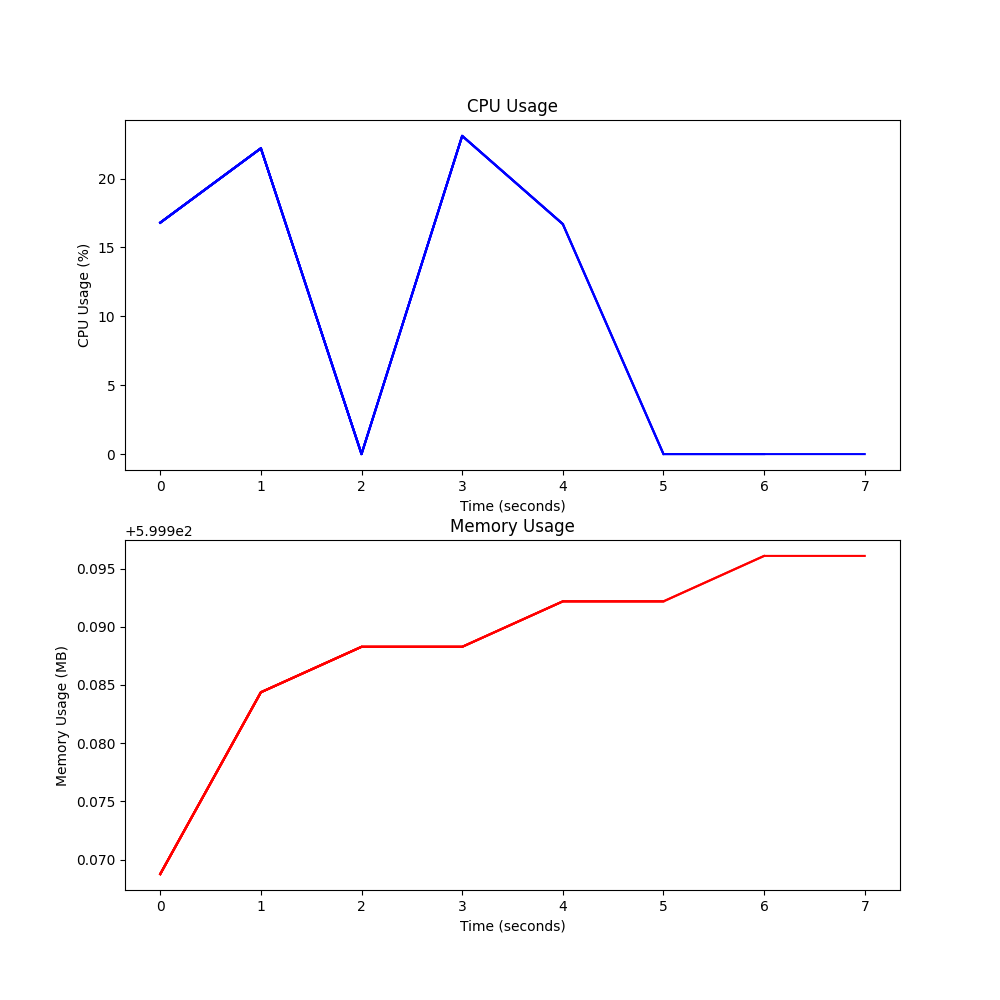

Truck 1:
  Distance: 2589.58 km
  Time: 40 hours 7 minutes
  Gas consumption: 1156.8 L
  Gas cost: 1966.6699999999998 €
  Human cost: 360.7800000000001 €
Truck 2:
  Distance: 2797.2200000000003 km
  Time: 49 hours 16 minutes
  Gas consumption: 1227.1299999999999 L
  Gas cost: 2086.09 €
  Human cost: 443.68000000000006 €


In [91]:
num_ants = 20
alpha = 1
beta = 2
evaporation = 0.5
iterations = 100
nb_trucks = 2

running(num_ants=num_ants, nb_trucks=nb_trucks, evaporation=evaporation, alpha=alpha, beta=beta, iterations=iterations)
calculate_results()

##### Algorithme du recuit simulé

In [ ]:
import csv
import datetime
import os

import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import time
import math
import psutil
from sklearn.cluster import KMeans

# Paramètres de contrôle
temp_init = 10000
cooling = 0.995
temp_min = 0.0001
nb_trucks = 3
reheat_threshold = 0.001
reheat_value = 300
max_reheat_count = 6

# Chemin du fichier contenant la matrice de coûts
cost_matrix_file_path = 'vendor/coords/matrix.txt'


def read_coordinates():
    coordinates = []
    with open('vendor/coords/list.txt', 'r') as file:
        for line in file:
            parts = line.strip().split()
            x = float(parts[1])
            y = float(parts[2])
            coordinates.append((x, y))
    return coordinates


def read_cost_matrix(file_path):
    cost_matrix = []
    with open(file_path, 'r') as file:
        for line in file:
            row = [float(value) if value != 'nan' else np.nan for value in line.strip().split()]
            cost_matrix.append(row)
    return np.array(cost_matrix)


def generate_random_tour(cost_matrix):
    city_count = len(cost_matrix)
    return random.sample(range(city_count), city_count)


def distance(tour, cities):
    distance = 0
    for i in range(1, len(tour)):
        distance += np.linalg.norm(np.array(cities[tour[i - 1]]) - np.array(cities[tour[i]]))
    distance += np.linalg.norm(np.array(cities[tour[-1]]) - np.array(cities[0]))
    return distance


def split_tour(tour, num_trucks, cities):
    city_count = len(tour)
    city_coordinates = [cities[i] for i in tour]

    kmeans = KMeans(n_clusters=num_trucks, n_init=10, random_state=0).fit(city_coordinates)
    labels = kmeans.labels_

    sub_tours = [[] for _ in range(num_trucks)]
    for i, label in enumerate(labels):
        sub_tours[label].append(tour[i])

    for i in range(num_trucks):
        if sub_tours[i][0] != 0:
            sub_tours[i].insert(0, 0)
        if sub_tours[i][-1] != 0:
            sub_tours[i].append(0)

    return sub_tours


def simulated_annealing(cost_matrix, temp_init, cooling, temp_min, reheat_threshold, reheat_value, max_reheat_count):
    start_time = time.time()
    cities = read_coordinates()
    current_tour = generate_random_tour(cost_matrix)
    current_distance = distance(current_tour, cities)
    best_tour = current_tour
    best_distance = current_distance
    temperature = temp_init
    nb_iterations = 0
    reheat_count = 0

    while temperature > temp_min:
        nb_iterations += 1

        new_tour = copy.copy(current_tour)
        swap_indices = random.sample(range(1, len(new_tour)), 2)
        new_tour[swap_indices[0]], new_tour[swap_indices[1]] = new_tour[swap_indices[1]], new_tour[swap_indices[0]]

        new_distance = distance(new_tour, cities)
        delta_distance = new_distance - current_distance

        if delta_distance < 0 or random.random() < math.exp(-delta_distance / temperature):
            current_tour = new_tour
            current_distance = new_distance

        if current_distance < best_distance:
            best_tour = current_tour
            best_distance = current_distance

        temperature *= cooling

        if temperature < reheat_threshold and reheat_count < max_reheat_count:
            temperature += reheat_value
            reheat_count += 1

    sub_tours = split_tour(best_tour, nb_trucks, cities)

    total_distance = 0
    for i, sub_tour in enumerate(sub_tours):
        sub_tour_distance = distance(sub_tour, cities)
        print("Tour {}: Length {}, Route: {}".format(i + 1, sub_tour_distance, sub_tour))
        total_distance += sub_tour_distance

    print("Total distance: {}".format(total_distance))
    print("Execution time in seconds: ", time.time() - start_time)
    print("Number of iterations: {}".format(nb_iterations))

    # Modification ici: écrire les sous-tours dans le fichier composite_road.txt
    with open('vendor/coords_rec/composite_road.txt', 'w') as file:
        for i, sub_tour in enumerate(sub_tours):
            sub_tour_distance = distance(sub_tour, cities)
            print("Tour {}: Length {}, Route: {}".format(i + 1, sub_tour_distance, sub_tour))
            # Écriture du sous-tour
            for city_index in sub_tour:
                file.write(str(city_index) + '\n')
            # Écriture de la démarcation (série de tirets) entre les sous-tours
            if i < len(sub_tours) - 1:
                file.write('-----\n')
            total_distance += sub_tour_distance

    with open('vendor/coords_rec/road.txt', 'w') as file:
        for city_index in best_tour:
            file.write(str(city_index) + '\n')
    return best_tour, best_distance


def calculate_results(best_tour):
    cities_file_path = 'vendor/Coords_rec/road.txt'
    distances_file_path = 'vendor/coords/distances.txt'
    times_file_path = 'vendor/coords/times.txt'
    gas_file_path = 'vendor/coords/gas.txt'
    gas_cost_file_path = 'vendor/coords/gas_cost.txt'
    human_cost_file_path = 'vendor/coords/human_cost.txt'

    with open(cities_file_path, 'r') as cities_file:
        cities = [int(line.strip()) for line in cities_file]

    with open(distances_file_path, 'r') as distances_file:
        distance_lines = [line.strip().split() for line in distances_file]
        distance_matrix = [[float(distance) for distance in line] for line in distance_lines]

    with open(times_file_path, 'r') as times_file:
        time_lines = [line.strip().split() for line in times_file]
        time_matrix = [[float(time) for time in line] for line in time_lines]

    with open(gas_file_path, 'r') as gas_file:
        gas_lines = [line.strip().split() for line in gas_file]
        gas_matrix = [[float(gas) for gas in line] for line in gas_lines]

    with open(gas_cost_file_path, 'r') as gas_cost_file:
        gas_cost_lines = [line.strip().split() for line in gas_cost_file]
        gas_cost_matrix = [[float(gas_cost) for gas_cost in line] for line in gas_cost_lines]

    with open(human_cost_file_path, 'r') as human_cost_file:
        human_cost_lines = [line.strip().split() for line in human_cost_file]
        human_cost_matrix = [[float(human) for human in line] for line in human_cost_lines]

    # Lire la matrice des distances
    with open('vendor/coords/distances.txt', 'r') as distances_file:
        distance_lines = [line.strip().split() for line in distances_file]
        distance_matrix = [[float(distance) for distance in line] for line in distance_lines]

    total_distance = 0
    total_time = 0
    total_gas = 0
    total_gas_cost = 0
    total_human_cost = 0
    num_cities = len(cities) - 1

    for i in range(num_cities - 1):
        start_city = cities[i]
        end_city = cities[i + 1]
        distance = distance_matrix[start_city][end_city]
        time = time_matrix[start_city][end_city]
        gas = gas_matrix[start_city][end_city]
        gas_cost = gas_cost_matrix[start_city][end_city]
        human_cost = human_cost_matrix[start_city][end_city]
        total_distance += distance
        total_time += time
        total_gas += gas
        total_gas_cost += gas_cost
        total_human_cost += human_cost

    hours = int(total_time)
    minutes = int((total_time - hours) * 60)

    print("Distance:", total_distance, "km")
    print("Time:", f"{hours} hours {minutes} minutes")
    print("Gas consumption:", total_gas, "L")
    print("Gas cost:", total_gas_cost, "€")
    print("Human cost:", total_human_cost, "€")



perf_iterations=1

writer = None
if perf_iterations > 1:
    filename = 'vendor/benchmarks/rec_complete/'
    os.makedirs(os.path.dirname(filename), exist_ok=True)  # create folder if it doesn't exist
    benchfile = open(f"{filename}/{datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')}.csv", mode='w',newline='')# open file

    writer = csv.writer(benchfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)  # create csv writer
    writer.writerow(["iteration", "runtime (ms)", "CPU time (ms)", "memory (mb)", "nb_nodes", "nb_edges", "cost",
                     "path"])  # write header

for i in range(perf_iterations):
    # Start time and resource usage
    start_time = time.time()
    start_cpu_time = psutil.Process().cpu_times().user
    start_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024

    # Lancement de l'algorithme de recuit simulé
    best_tour, best_distance = simulated_annealing(
        read_cost_matrix(cost_matrix_file_path), temp_init, cooling, temp_min, reheat_threshold, reheat_value,
        max_reheat_count)

    # End time and resource usage
    end_cpu_time = psutil.Process().cpu_times().user
    end_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024
    end_time = time.time()

    # Calculate execution time and resource usage
    execution_time = end_time - start_time
    cpu_time = end_cpu_time - start_cpu_time
    memory_usage = end_memory_usage - start_memory_usage

    num_cities = len(best_tour)

    if perf_iterations > 1:
        writer.writerow([i, execution_time * 1000, cpu_time * 1000, memory_usage, num_cities, num_cities ** 2, best_distance, best_tour])

# Calcul et affichage des résultats
calculate_results(best_tour)


__Génération de tour aléatoire__
def generate_random_tour(cost_matrix):
Génère un ordre aléatoire des villes pour former un tour initial.

__Calcul de distance__
def distance(tour, cities):
Calcule la distance totale d'un tour donné en utilisant les coordonnées des villes.

__Division du tour__
def split_tour(tour, num_trucks, cities):
Divise un tour en sous-tours en utilisant l'algorithme K-Means pour le clustering.

__Recuit Simulé__
def simulated_annealing(cost_matrix, temp_init, cooling, temp_min, reheat_threshold, reheat_value, max_reheat_count):
Implémente l'algorithme de recuit simulé. Il génère des tours de manière aléatoire et les évalue en fonction de leur distance. L'algorithme peut accepter des solutions moins optimales au début, mais devient de plus en plus sélectif à mesure que la "température" diminue. Cette fonction utilise également un mécanisme de réchauffage pour sortir des minimums locaux.

##### Statistiques
<img src="vendor/reports/Distancevsiterations100.png"> <br>
<img src="vendor/reports/Distancevsiterations.png">

Le premier graphique montre comment la distance parcourue par les fourmis évolue au fil des itérations, de 0 à 100 itérations. On peut observer une diminution progressive de la distance, ce qui indique que les fourmis trouvent des chemins plus courts à mesure qu'elles explorent différentes solutions. Cela suggère que l'algorithme de colonie de fourmis est en train de converger vers une solution optimale.

Le deuxième graphique étend la plage d'itérations jusqu'à 1000 itérations, offrant ainsi une vue plus détaillée de l'évolution de la distance. On peut remarquer des fluctuations dans la distance à mesure que les itérations augmentent, mais en général, on observe une tendance à la baisse. Cela indique que l'algorithme continue à améliorer la solution en explorant davantage d'options. Finalement, la distance se stabilise et ne diminue que légèrement, ce qui suggère que l'algorithme a atteint une solution relativement optimale.
<img src="vendor/reports/pheromone.png">
Le graphique des phéromones au cours du temps montre comment les niveaux de phéromones évoluent sur les arêtes du graphe au fur et à mesure de l'exécution de l'algorithme de colonie de fourmis. Au début de l'algorithme, les niveaux de phéromones sont généralement élevés et uniformes sur toutes les arêtes, ce qui donne aux fourmis des indicationssimilaires sur les chemins à explorer. Cela encourage l'exploration initiale de différentes routes.
Puis, au fil du temps et des itérations de l'algorithme, les niveaux de phéromones commencent à diminuer sur certaines arêtes du graphe. Cette diminution progressive des niveaux de phéromones est due à l'évaporation.
<img src="vendor/reports/alpha.png">
Ce graphique montre comment la valeur d'alpha affecte la précision de notre algorithme. Lorsque la valeur d'alpha augmente, la précision de la distance parcourue par les fourmisdiminue. En d'autres termes, des valeurs d'alpha plus élevées conduisent à des résultats moins précis. Cela signifie que notre algorithme devient moins précis à mesure que
 nous augmentons la valeur d'alpha. Par conséquent, pour obtenir les résultats les plus précis, il est préférable de choisir une valeur d'alpha relativement faible, proche de 1. <br>
Dans le cadre de notre projet nous choisissons une valeur de alpha de 1 car elle permet d'obtenir une distance moyenne minimale.
<img src="vendor/reports/betadist.png">
Le graphique de la distance moyenne en fonction de la valeur de beta montre comment la distance moyenne parcourue par les fourmis évolue en fonction de la valeur de beta. On peut observer que la distance moyenne diminue à mesure que la valeur de beta augmente. Cela suggère que les fourmis sont plus susceptibles de choisir des arêtes avec des niveaux de phéromones élevés, ce qui les amène à choisir des chemins plus courts. <br>
Dans le cadre de notre projet nous choisissons une valeur de beta de 4 car elle permet d'obtenir une distance moyenne minimale.

<img src="vendor/reports/1000.png">

Ce graphique représente le trajet obtenu par notre programme pour visiter 1000 villes. Chaque point sur le graphique représente une ville, et la ligne qui les relie indique l'ordre dans lequel elles doivent être visitées. On peut observer que le trajet est relativement court, ce qui suggère que notre algorithme a trouvé une solution se rapprochant à un certain degré de l'optimal <br>
<img src="vendor/reports/RAMCPU.png">
Ce graphique montre l'utilisation du CPU lors de la résolution d'un problème avec 1000 villes. On peut observer des pics d'utilisation, ce qui indique des moments où le CPU est fortement sollicité. En ce qui concerne la mémoire, le programme atteint un pic de 260 Mo, correspondant à la quantité de mémoire nécessaire pour stocker les données des 1000 villes. Ces informations nous permettent d'évaluer les performances du programme et de prendre des mesures d'optimisation si nécessaire.


### 2. Algorithmes avec graphe quelconque
<br></br>
##### Création de l'instance

In [52]:
from itertools import combinations, groupby


class Node:
    def __init__(self, node_name):
        self.node_name = str(node_name)
        self.degree = 0
        self.neighbors = []

class Edge:
    def __init__(self, node1: str, node2: str, weight: int):
        self.node1 = node1
        self.node2 = node2
        self.weight = weight
        self.pheromone = 0

class Graph:
    def __init__(self):
        self.adjacencyMatrix = [] # Adjacency matrix
        self.nodes = {} # dict of {node_name: Node object}
        self.edges = {} # dict of {f"{node1},{node2}": Edge object}

    def get_edge(self, node_name_1, node_name_2):
        """
        Returns edge object if edge exists, else returns None
        :param node_name_1: node1 name
        :param node_name_2: node2 name
        :return: Edge object or None
        """

        try:
            return self.edges[f"{node_name_1},{node_name_2}"] # Try to get edge whit order node1, node2
        except KeyError:
            try:
                return self.edges[f"{node_name_2},{node_name_1}"] # Try to get edge whit order node2, node1
            except KeyError:
                return None # Edge does not exist

    def add_node(self, node_name: str):
        """
        Adds node to graph
        :param node_name: name of node
        :return:
        """

        self.nodes[node_name] = Node(node_name)

    def add_nodes_from_list(self, nodes: list):
        """
        Adds nodes to graph from list
        :param nodes: nodes [node1, node2, ...]
        :return: None
        """

        for i in nodes:
            self.add_node(str(i))

    def add_edge(self, node1: str, node2: str, weight: int):
        """
        Adds edge to graph
        :param node1: node1 name
        :param node2: node2 name
        :param weight: weight of edge
        :return: None
        """

        if node1 in self.nodes and node2 in self.nodes: # If both nodes exist
            for i in self.edges.keys(): # Check if edge already exists
                if node1 in i and node2 in i: # If edge already exists
                    if node1 != node2: # If edge is not a loop
                        return

                    if f"{node1},{node2}" in self.edges: # If edge exists with order node1, node2
                        return
            self.nodes[node1].degree += 1 # Increase degree of nodes
            self.nodes[node1].neighbors.append(node2) # Add node2 to node1 neighbors
            self.nodes[node2].degree += 1
            self.nodes[node2].neighbors.append(node1)
            self.edges[f"{node1},{node2}"] = Edge(node1, node2, weight) # Add edge to graph

    def add_edges_from_list(self, edges: list):
        """
        Adds edges to graph from list
        :param edges: edges [[node1, node2, weight], [node1, node2, weight], ...]
        :return None
        """

        for edge in edges:
            self.add_edge(edge[0], edge[1], edge[2])

    def remove_node(self, node_name: str):
        """
        Removes node from graph (if node exists)
        :param node_name: node name
        :return: None
        """

        if node_name in self.nodes:
            del self.nodes[node_name]

            # remove all links to this node
            for edge in self.edges.copy().values(): # copy() to avoid RuntimeError: dictionary changed size during iteration
                if edge.node1 == node_name or edge.node2 == node_name:
                    print(edge)
                    self.remove_edge(edge.node1, edge.node2)

    def remove_edge(self, node1: str, node2: str): # Removes edge from graph
        """
        Removes edge from graph (if edge exists)(order does not matter)
        :param node1: first node name
        :param node2: second node name
        :return: None
        """

        if f"{node1},{node2}" in self.edges: # If edge exists with order node1, node2
            del self.edges[f"{node1},{node2}"]
            if node1 in self.nodes:
                self.nodes[node1].degree -= 1
                self.nodes[node1].neighbors.remove(node2)
            if node2 in self.nodes:
                self.nodes[node2].degree -= 1
                self.nodes[node2].neighbors.remove(node1)

        elif f"{node2},{node1}" in self.edges: # If edge exists with order node2, node1
            del self.edges[f"{node2},{node1}"]
            if node1 in self.nodes:
                self.nodes[node1].degree -= 1
                self.nodes[node1].neighbors.remove(node2)
            if node2 in self.nodes:
                self.nodes[node2].degree -= 1
                self.nodes[node2].neighbors.remove(node1)

    def is_eulerian_path(self):
        """
        Checks if graph has an eulerian path (all nodes have even degree except 2 nodes that have odd degree)
        :return: True if graph has an eulerian path, else returns False
        """

        return all(self.nodes[i].degree % 2 == 0 for i in self.nodes)

    def get_adjency_matrix(self):
        """
        Generates adjacency matrix
        :return: list of lists (matrix)
        """

        self.adjacency_matrix()
        return self.adjacencyMatrix

    def print_adjency_matrix(self):
        """
        Prints formatted adjacency matrix
        :return: None
        """

        self.adjacency_matrix()
        for i in self.adjacencyMatrix:
            print(i)

    def adjacency_matrix(self):
        """
        Generates adjacency matrix
        :return: None
        """

        start_time = time.time()
        matrix = [[0] * len(self.nodes) for _ in range(
            len(self.nodes))]  # create matrix of 0s with size of nodes x nodes (len(nodes) x len(nodes)) (rows x columns)
        for edge in self.edges.values():  # for each edge in the graph
            # set the value of the matrix at the index of the nodes to the weight of the edge
            matrix[list(self.nodes.keys()).index(edge.node1)][list(self.nodes.keys()).index(edge.node2)] = edge.weight
            # do the symmetry
            matrix[list(self.nodes.keys()).index(edge.node2)][list(self.nodes.keys()).index(edge.node1)] = edge.weight

        self.adjacencyMatrix = matrix
        print("adjacency matrix generated in ", (time.time() - start_time)*1000, "ms")

    def clear(self):
        """
        Clears graph
        :return: None
        """

        self.nodes = {}
        self.edges = {}
        self.adjacencyMatrix = []

    def create_travel_cost(self, consumption_from_speed=None, job_cost_per_hour = 9, fuel_cost_per_liter = 1.5, distance = None):
        """
        Returns the cost of a travel in €
        :param consumption_from_speed: {speed in km/h: consumption in L/100km}
        :param job_cost_per_hour: job_cost_per_hour €/h
        :param fuel_cost_per_liter: fuel_cost_per_liter €/L
        :param distance: distance in km
        :return: cost in €
        """

        if distance is None:
            distance = random.randint(1, 100)

        if consumption_from_speed is None:
            consumption_from_speed = {
                30: 55,
                40: 48,
                50: 44,
                70: 33,
                90: 38,
                110: 44,
                130: 51,
            }


        speed = random.choice(list(consumption_from_speed.keys()))  # classic speeds limits in km/h
        consumption_per_hundred_km = consumption_from_speed[speed]  # consumption in L/100km

        travel_time = distance / speed  # travel time in hours
        consumption = consumption_per_hundred_km * (distance / 100)  # consumption in L

        travel_time_cost = travel_time * job_cost_per_hour  # total job cost in €
        fuel_cost = consumption * fuel_cost_per_liter  # total fuel cost in €

        # return math.floor(travel_time_cost + fuel_cost)  # total cost in €
        return distance

    def generate_random_graph(self, nodes: int=20, p:float=.5):
        """
        Generates random graph with nodes number and probability of having an edge
        :param nodes: number of nodes
        :param p: probability of link between two nodes
        :return: None
        """

        self.clear() #clear existing graph

        start_time = time.time()

        """
        Generates a random undirected graph, similarly to an Erdős-Rényi
        graph, but enforcing that the resulting graph is conneted
        """
        edges = combinations(range(nodes), 2) # all possible edges
        self.add_nodes_from_list(list(range(nodes))) # add nodes to graph (from 0 to nodes-1)

        if p >= 1: # if p >= 1 then all nodes are connected
            for node_edges in edges:
                node_edge=list(node_edges)
                node_edge.append(self.create_travel_cost())
                self.add_edge(str(node_edge[0]), str(node_edge[1]), node_edge[2])

        for node, node_edges in groupby(edges, key=lambda x: x[0]): # for each node and its edges
            node_edges = list(node_edges)
            choice = random.choice(node_edges) # choose a random edge
            self.add_edge(str(choice[0]), str(choice[1]), self.create_travel_cost()) # add edge to graph

            for e in node_edges:
                if random.random() < p: # randomize if edge is added to graph
                    if e[0] != e[1]: #if the same city then no distance nor speed
                        self.add_edge(str(e[0]), str(e[1]), self.create_travel_cost()) # add edge to graph
                    else:
                        self.add_edge(str(e[0]), str(e[1]), 0) # add edge to graph

        self.adjacency_matrix() # generate adjacency matrix
        print("graph generated in ", (time.time() - start_time)*1000, "ms")


    def node_and_edges_from_adjacency_matrix(self, adjacency_matrix: list):
        """
        Generates nodes and edges from adjacency matrix
        :param adjacency_matrix: adjacency matrix [[0, 1, 2], [1, 0, 3], [2, 3, 0], ...]
        :return: None
        """

        self.clear() # clear existing graph
        for i in range(len(adjacency_matrix)): # create nodes
            self.add_node(str(i))
        for i in range(len(adjacency_matrix)): # create edges
            for j in range(len(adjacency_matrix[i])):
                if adjacency_matrix[i][j] != 0: # if there is a link between the two nodes
                    self.add_edge(str(i), str(j), adjacency_matrix[i][j])

    def plot_graph(self):
        """
        Plots graph using matplotlib and networkx
        :return: None
        """

        import networkx as nx
        import matplotlib.pyplot as plt
        start_time = time.time()
        self.adjacency_matrix()

        graph = nx.empty_graph()
        graph.add_nodes_from(self.nodes.keys())

        layout = nx.random_layout(graph) # layout of the graph

        for edge in self.edges.values():
            graph.add_edge(edge.node1, edge.node2) # add edges to the graph

        fig_size = len(self.nodes)/15 if (len(self.nodes)>100) else 10
        nodes_size = 1000 if (len(self.nodes)>100) else 500

        plt.figure(figsize=(fig_size, fig_size))
        nx.draw_networkx(graph, pos=layout, node_size=nodes_size) # draw graph
        plt.savefig('graph.svg')
        plt.show()
        print("graph plotted in ", (time.time() - start_time)*1000, "ms")


    def graph_from_coordinates(self, coordinates: list):
        """
        Generates graph from coordinates
        :param coordinates: list of coordinates [[x1, y1], [x2, y2], ...]
        :return: None
        """

        self.clear()
        for i in range(len(coordinates)):
            self.add_node(str(i))

        for i in self.nodes:
            for j in self.nodes:
                if i != j:
                    x1, y1 = coordinates[int(i)].split(";")
                    x2, y2 = coordinates[int(j)].split(";")
                    weight = self.create_travel_cost(distance=((int(x2) - int(x1)) ** 2 + (int(y2) - int(y1)) ** 2) ** 0.5)
                    self.add_edge(str(i), str(j), weight)


    def graph_from_coords_file(self, file: str):
        """
        Generate graph from file
        :param file: file path
        :return: None
        """
        self.clear()

        with open(file, "r") as f:
            coords = f.readlines()

            self.add_nodes_from_list(list(range(len(coords))))

            for i in self.nodes:
                for j in self.nodes:
                    if i != j:
                        x1, y1 = coords[int(i)].split(" ")[:2]
                        x2, y2 = coords[int(j)].split(" ")[:2]
                        weight = self.create_travel_cost(distance=((int(x2) - int(x1)) ** 2 + (int(y2) - int(y1)) ** 2) ** 0.5)
                        self.add_edge(str(i), str(j), weight)

    def graph_from_matrix_file(self, file: str):
        """
        Generate graph from file
        :param file: file path
        :return: None
        """
        self.clear()

        with open(file, "r") as f:
            matrix = f.readlines()

            self.node_and_edges_from_adjacency_matrix([[float(i) for i in line.split(" ")] for line in matrix])


    def print_graph(self):
        """
        Prints formatted graph content
        :return: None
        """

        print("Nodes:")
        for key, value in self.nodes.items():
            print(key)
            for i in self.edges.keys():
                if key in i:
                    print("  ", i, self.edges[i].weight)

adjacency matrix generated in  2.0008087158203125 ms
graph generated in  6.54292106628418 ms
adjacency matrix generated in  2.0034313201904297 ms


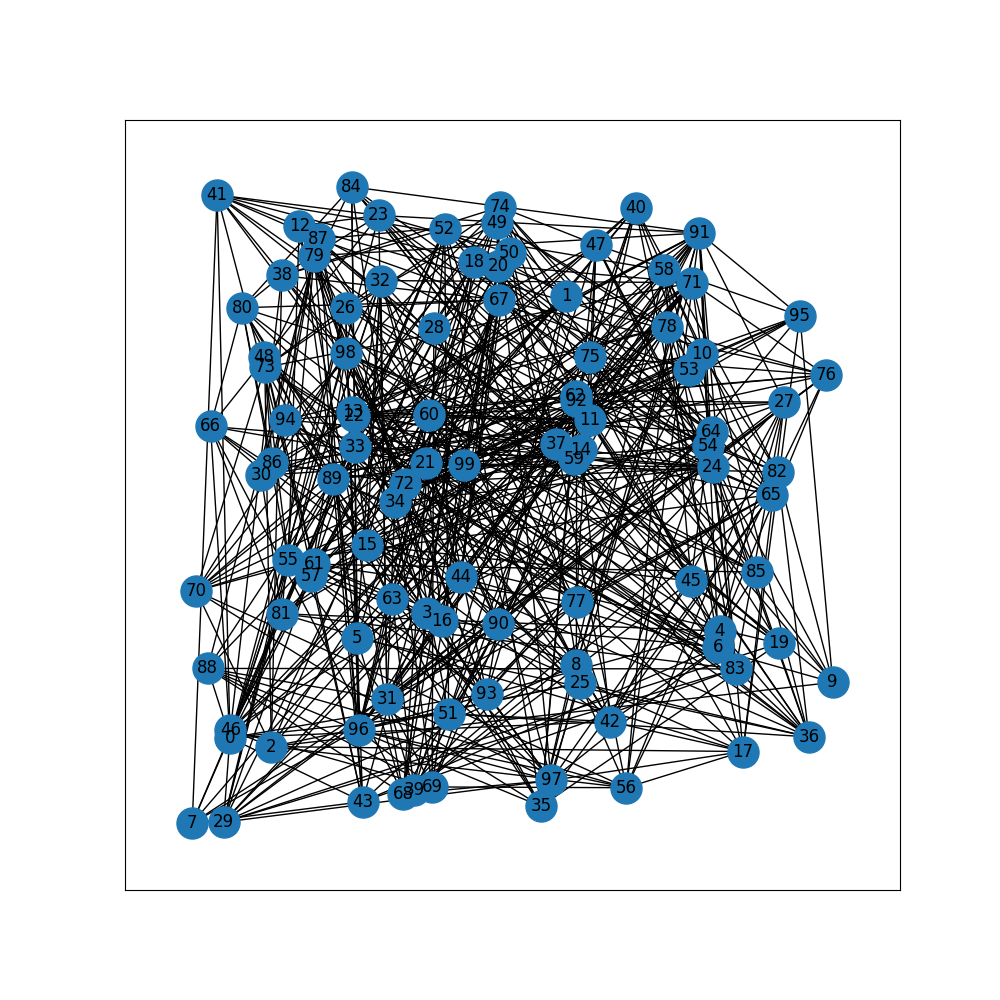

graph plotted in  200.17766952514648 ms


In [63]:
graph = Graph()
graph.generate_random_graph(100, 0.1)
graph.plot_graph()

##### Algorithme de colonies de fourmis

In [74]:
def aco(graph:Graph, start_node, num_ants:int = 10, alpha:int = 1, beta:int = 2, evaporation:float = 0.5, already_visited_penalty:float = 0.5, iterations:int = 10, max_iterations_without_improvement=10000):
    """
    heuristic aco algorithm for finding the shortest path in a graph
    :param graph: graph to use
    :param start_node: node to start from
    :param num_ants: number of ants to use
    :param alpha: pheromone importance
    :param beta: distance importance
    :param evaporation: pheromone evaporation rate
    :param already_visited_penalty: penalty for already visited nodes
    :param iterations: number of iterations to run
    :return: tuple of (best path cost, best path)
    """

    best_path = []
    start_node = str(start_node)
    start_time = time.time()

    for _ in range(iterations): # Run ant colony optimization for a fixed number of iterations
        print("iteration", _)
        paths = []
        for _ in range(num_ants): # Create ant agents
            # print("ant", _)
            current_city = graph.nodes[start_node] #start from start node
            unvisited_cities = list(graph.nodes.keys()) #list of unvisited cities
            path = []
            edges = []
            cost = 0
            last_city = None

            iterations_without_improvement = 0
            last_size_unvisited_cities=len(unvisited_cities)

            while (unvisited_cities!=[] or current_city.node_name != start_node) :
                # Construct path by iteratively choosing next city until all cities have been visited or if too many iterations without improvement
                neighbor_choice_probabilities = []
                total = 0

                #choose next city
                for neighbor in current_city.neighbors:

                    edge = graph.get_edge(current_city.node_name, neighbor) #get edge between current city and neighbor
                    pheromone = edge.pheromone ** alpha  # Calculate pheromone value
                    distance = 1/edge.weight ** beta if edge.weight != 0 else 0
                    score = pheromone * distance if pheromone != 0 else 1*distance

                    if not unvisited_cities and neighbor == start_node:
                        #if all cities have been visited, give a big bonus to the path that ends in the start node
                        score = score * 1000
                    elif neighbor in path:
                        if neighbor == last_city.node_name:
                            # penalize going back to the last city
                            score = score/1000
                        score = already_visited_penalty * score # penalize already visited cities to avoid loops

                    total += score
                    neighbor_choice_probabilities.append(score)

                probabilities = []
                for p in neighbor_choice_probabilities:
                    if p == 0:
                        probabilities.append(0) # avoid division by 0
                        continue
                    probabilities.append(p / total)  # Calculate probabilities
                if current_city.node_name in unvisited_cities:
                    unvisited_cities.remove(current_city.node_name) #remove current city from unvisited cities
                path.append(current_city.node_name)


                if len(unvisited_cities) < last_size_unvisited_cities:
                    #if we visited a new city, reset the number of iterations without improvement
                    iterations_without_improvement = 0
                else:
                    #if we didn't visit a new city, increment the number of iterations without improvement
                    iterations_without_improvement += 1
                last_size_unvisited_cities = len(unvisited_cities)
                if iterations_without_improvement > max_iterations_without_improvement:
                    #if we didn't visit a new city for too long, stop
                    break

                last_city = current_city
                current_city = graph.nodes[np.random.choice(current_city.neighbors, p=probabilities)]  # Choose next city
                edges.append(graph.get_edge(last_city.node_name, current_city.node_name)) #add edge to path
                cost += graph.get_edge(last_city.node_name, current_city.node_name).weight #add edge weight to cost

            if iterations_without_improvement < max_iterations_without_improvement:
                #avoid adding paths when exceeding the number of iterations without improvement

                #add the return to start node
                path.append(start_node)
                cost += graph.get_edge(last_city.node_name, start_node).weight
                paths.append((cost,path))

                for edge in list(set(edges)): # Update pheromone values on edges
                    edge.pheromone += 1 / cost
                    edge.pheromone *= (1 - evaporation)  # Evaporate pheromone on all edges
        if not paths:
            best_path = ('no reasonable path found', [])
            continue
        best_path = min(paths, key=lambda x: x[0]) # set the new best path
    print("time", (time.time()-start_time)*1000,"ms")
    print("best cost", best_path[0])
    print("best path", best_path[1])

    return best_path # Return best path

In [75]:
# Code avec paramètres pour lancer l'aco
aco(graph=graph, start_node='0',iterations=100)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

(8814,
 ['0',
  '43',
  '89',
  '83',
  '84',
  '96',
  '97',
  '29',
  '20',
  '82',
  '68',
  '3',
  '15',
  '70',
  '73',
  '71',
  '8',
  '29',
  '14',
  '41',
  '61',
  '77',
  '12',
  '54',
  '93',
  '40',
  '72',
  '24',
  '21',
  '76',
  '4',
  '27',
  '92',
  '60',
  '96',
  '97',
  '31',
  '64',
  '46',
  '69',
  '59',
  '47',
  '11',
  '91',
  '56',
  '88',
  '1',
  '2',
  '38',
  '83',
  '84',
  '96',
  '97',
  '99',
  '95',
  '47',
  '11',
  '22',
  '87',
  '49',
  '78',
  '6',
  '97',
  '96',
  '84',
  '83',
  '13',
  '85',
  '47',
  '59',
  '98',
  '19',
  '74',
  '94',
  '97',
  '96',
  '84',
  '83',
  '13',
  '34',
  '69',
  '59',
  '47',
  '11',
  '72',
  '51',
  '53',
  '99',
  '95',
  '9',
  '75',
  '24',
  '21',
  '76',
  '4',
  '81',
  '33',
  '32',
  '98',
  '19',
  '15',
  '70',
  '73',
  '26',
  '67',
  '20',
  '74',
  '94',
  '83',
  '38',
  '80',
  '66',
  '0',
  '98',
  '19',
  '29',
  '97',
  '96',
  '74',
  '94',
  '37',
  '98',
  '19',
  '74',
  '94',
  '

**Pistes d'amélioration:**
- L'algorithme à tendance à se perdre dans les grandes instances, il ne lui reste plus que quelques villes à visiter mais il ne trouve pas le chemin le plus court pour y arriver. Nous avons essayé d'ajouter une pénalité pour les villes déjà visitées, mais cela ne suffit pas à résoudre le problème.
- L'algorithme est long à s'exécuter sur les grandes instances, il faudrait trouver un moyen de l'accélérer.


##### Algorithme génétique

In [40]:
def genetic(nb_generations, nb_solutions, nb_kept_solutions, mutation_rate, cross_over_rate, start_node, graph=None):
    """
    Core function of genetic algorithm

    :param nb_generations: Number of generations
    :param nb_solutions: Number of solutions
    :param nb_kept_solutions: Number of solutions retained for next generation
    :param mutation_rate: Chance to apply a mutation operation to a solution
    :param cross_over_rate: Chance to apply a cross-over operation to a solution
    :param start_node: Starting point of the route
    :param graph: Graph to use
    :return: Tuple of the best cost and the list of traveled nodes
    """

    if graph is None:
        graph = Graph()
        graph.generate_random_graph(100)

    # Initialize the list that will store the fitness of each generation.
    generation = []
    solutions = []
    start_time = time.time()

    for _ in range(nb_generations):
        # Generate new solutions for the current generation.
        solutions = generate_solutions(graph, solutions, start_node, nb_solutions, nb_kept_solutions)
        # Evaluate the fitness of each solution in the current generation.
        generation = evaluate_fitness(graph, solutions, generation)

        print(f'Generation: {_ + 1}, Distance: {generation[0][0]} km')
        # Perform the natural selection (selection ,cross-over, mutation) process on the current generation.
        best_solutions = natural_selection(graph, generation, start_node, nb_kept_solutions, cross_over_rate,
                                            mutation_rate)

        solutions = best_solutions
        generation = []

    # Evaluate the fitness of each solution in the last generation.
    best_found_path = evaluate_fitness(graph, solutions, generation)[0]

    # Print result information
    print_best_path_details(best_found_path, start_time)
    return best_found_path

def evaluate_fitness(graph, solutions, gen):
    """
    Computes the total weight of the path in the graph for all solutions in a population.

    :param graph: Graph to use
    :param solutions: Solution population
    :param gen: Empty list ready to receive solutions and their costs
    :return: List of solutions sorted by cost
    """

    for i in solutions:
        path_cost = sum(
            graph.get_edge(i[j], i[(j + 1)]).weight for j in range(len(i) - 1)
        )
        # Append each solution along with its cost to the generation list.
        gen.append((path_cost, i))
    # Sort the generation list by cost, so that the best (lowest cost) solutions are first.
    gen = sorted(gen, key=lambda x: x[0])
    return gen


def generate_solutions(graph, solutions, start_node, nb_solutions, nb_kept_solutions):
    """
    Generates a selected number of random solutions.

    :param graph: Graph to use
    :param solutions: Solution population
    :param start_node: Starting point of the route
    :param nb_solutions: Number of solutions
    :param nb_kept_solutions: Number of solutions retained for next generation
    :return: List of solutions (population)
    """

    if len(solutions) == nb_kept_solutions:
        # Extend the solutions list with new randomly generated solutions, until we reach the required number of solutions for a generation.
        solutions.extend(
            random_solution(graph, start_node)
            for __ in range(nb_solutions - nb_kept_solutions)
        )
    else:
        # Extend the solutions list with new randomly generated solutions, until we reach the required number of solutions for a generation.
        solutions.extend(
            random_solution(graph, start_node)
            for __ in range(nb_solutions)
        )
    return solutions


def random_solution(graph, start_node):
    """
    Creates a random path in the graph starting from a specified node.

    :param graph: Graph to use
    :param start_node: Starting point of the route
    :return: List of traveled nodes
    """

    path = [start_node]
    nodes_list = list(graph.nodes.keys())
    nodes_list.pop(nodes_list.index(start_node))
    next_node = random.choice(graph.nodes[start_node].neighbors)

    # This loop continues until we have visited all nodes and returned back to the start node.
    while nodes_list or path[0] != path[-1]:
        path.append(next_node)
        if next_node in nodes_list:
            nodes_list.pop(nodes_list.index(next_node))

        # Add the next node to the path based on the current node's neighbors
        next_node = random.choice(graph.nodes[next_node].neighbors)

    return path


def natural_selection(graph, generation, start_node, nb_kept_solutions, cross_over_rate, mutation_rate):
    """
    Selects the best solutions and performs crossover and mutation operations.

    :param graph: Graph to use
    :param generation: List of solutions sorted by cost
    :param start_node: Starting point of the route
    :param nb_kept_solutions: Number of solutions retained for next generation
    :param cross_over_rate: Chance to apply a cross-over operation to a solution
    :param mutation_rate: Chance to apply a mutation operation to a solution
    :return: List of traveled nodes of the mutated child
    """

    # Start the new generation with the best solution from the old generation.
    best_solutions = [generation[0][1]]

    #Perform crossover and mutation operations on each solution to generate new solutions for the next generation.
    best_solutions.extend(
        mutate(cross_over(
            generation[i][1],
            generation[i + 1][1],
            graph,
            cross_over_rate,
            start_node,
        ), mutation_rate, graph)
        for i in range(nb_kept_solutions - 1)
    )
    return best_solutions


def cross_over(parent_1, parent_2, graph, cross_over_rate, start_node):
    """
    Performs a crossover operation between two parent solutions to generate a new solution.

    :param parent_1: First parent of the cross-over operation
    :param parent_2: Second parent of the cross-over operation
    :param graph: Graph to use
    :param cross_over_rate: Chance to apply a cross-over operation to a solution
    :param start_node: Starting point of the route
    :return: List of traveled nodes of the child
    """

    # Depending on the crossover rate, this line determines whether the crossover operation should be performed.
    if random.random() > cross_over_rate:
        return parent_1

    # Create an index dictionary for each node
    indices_dict_parent_1 = create_indices_dict(parent_1)
    indices_dict_parent_2 = create_indices_dict(parent_2)

    return create_new_path(
        start_node,
        graph,
        indices_dict_parent_1,
        indices_dict_parent_2,
        parent_1,
        parent_2,
    )


def mutate(sol, mutation_rate, graph):
    """
    Randomly swaps two nodes in a solution to create a mutated solution.

    :param sol: List of traveled nodes after cross-over operation
    :param mutation_rate: Chance to apply a mutation operation to a solution
    :param graph: Graph to use
    :return: List of traveled nodes of the mutated child
    """

    # # Depending on the mutation rate, this line determines whether the mutation operation should be performed.
    if random.random() > mutation_rate:
        return sol

    # Attempt the mutation several times given the low probability of success
    for _ in range(len(sol) * 10):
        # Choose 2 random index in the solution
        idx1, idx2 = random.sample(range(1, len(sol) - 1), 2)

        # if the indexes correspond to the same node, skip this iteration
        if sol[idx1] == sol[idx2]:
            continue

        mutated_sol = list(sol)

        # Invert the 2 nodes corresponding to the indexes
        mutated_sol[idx1], mutated_sol[idx2] = sol[idx2], sol[idx1]

        #Check if the path is valid
        if is_valid_path(mutated_sol, idx1, idx2, graph):
            return mutated_sol

    return sol


def create_indices_dict(parent):
    """
    Creates a dictionary with nodes as keys and their indices in the parent as values.

    :param parent: One of the two chosen parent for the cross-over operation
    :return: Dictionary with nodes as keys and their indices in the parent as values
    """

    indices_dict = defaultdict(list)
    for index, node in enumerate(parent):
        indices_dict[node].append(index)
    return indices_dict


def create_new_path(start_node, graph, indices_dict_parent_1, indices_dict_parent_2, parent_1, parent_2):
    """
    Creates a new path by performing crossover.

    :param start_node: Starting point of the route
    :param graph: Graph to use
    :param indices_dict_parent_1: Dictionary with nodes as keys and their indices in the parent 1 as values
    :param indices_dict_parent_2: Dictionary with nodes as keys and their indices in the parent 2 as values
    :param parent_1: Chosen parent for the cross-over operation
    :param parent_2: Chosen parent for the cross-over operation
    :return: New list of the traveled nodes after cross-over operation
    """

    new_path = [start_node]
    nodes_list = list(graph.nodes.keys())
    # We remove the starting node from the list of nodes we haven't visited yet.
    nodes_list.remove(start_node)

    current_node = start_node

    # This loop continues until we have visited all nodes and returned back to the start node.
    while nodes_list or new_path[0] != new_path[-1]:

        # Selects the next node to be added to the new path.
        next_node = get_next_node(graph, current_node, indices_dict_parent_1, indices_dict_parent_2, nodes_list, parent_1, parent_2)
        new_path.append(next_node)

        # If the next node was in our list of nodes to visit, we remove it.
        if next_node in nodes_list:
            nodes_list.remove(next_node)

        current_node = next_node

    return new_path

def get_next_node(graph, current_node, indices_dict_parent_1, indices_dict_parent_2, nodes_list, parent_1, parent_2):
    """
    Selects the next node to be added to the new path.

    :param graph: Graph to use
    :param current_node: Current node in the new path
    :param indices_dict_parent_1: Dictionary with nodes as keys and their indices in the parent 1 as values
    :param indices_dict_parent_2: Dictionary with nodes as keys and their indices in the parent 2 as values
    :param nodes_list: List of untraveled nodes
    :param parent_1: Chosen parent for the cross-over operation
    :param parent_2: Chosen parent for the cross-over operation
    :return: Next node for the new path
    """

    # We randomly select one of the indices from parent 1 where the current node appears.
    chosen_index_parent_1 = random.choice(indices_dict_parent_1.get(current_node, []))

    # We get the next node in the sequence from parent 1.
    next_node_parent_1 = get_next_node_parent(parent_1, chosen_index_parent_1)


    # We randomly select one of the indices from parent 2 where the current node appears.
    chosen_index_parent_2 = random.choice(indices_dict_parent_2.get(current_node, []))

    # We get the next node in the sequence from parent 2.
    next_node_parent_2 = get_next_node_parent(parent_2, chosen_index_parent_2)

    # We randomly select the next node from the choices given by each parent.
    # If neither parent gives a viable next node, we select a valid node from the graph, preferably one that has never been visited.
    return random.choice(
        [next_node_parent_1, next_node_parent_2]
    ) or get_valid_next_node(graph, current_node, nodes_list)


def get_next_node_parent(parent, chosen_index):
    """
    Gets the next node in the parent solution.

    :param parent: One of the two chosen parent for the cross-over operation
    :param chosen_index: One random index of the current node in the parent
    :return: Next node of one of the parents for the new path
    """

    return parent[chosen_index + 1] if chosen_index < len(parent) - 1 else None


def get_valid_next_node(graph, current_node, nodes_list):
    """
    Selects a valid next node from the graph.

    :param graph: Graph to use
    :param current_node: Current node in the new path
    :param nodes_list: List of untraveled nodes
    :return: Next node for the new path
    """

    # Searches among the neighbours of the current node, if there is a node that has never been visited.
    if valid_next_nodes := [
        node
        for node in graph.nodes[current_node].neighbors
        if node in nodes_list
    ]:
        return random.choice(valid_next_nodes)
    # If not, take a random neighbor for the next node.
    else:
        return random.choice(graph.nodes[current_node].neighbors)


def is_valid_path(path, i1, i2, graph):
    """
    Checks whether a path is valid by verifying that there are edges between each pair of adjacent nodes.

    :param path: Mutated path
    :param i1: Index of an inverted node
    :param i2: Index of another inverted node
    :param graph: Graph to use
    :return: Boolean value indicating whether the path is possible or not
    """

    return graph.get_edge(path[i1], path[i1 + 1]) and graph.get_edge(path[i1], path[i1 - 1]) and graph.get_edge(
        path[i2], path[i2 + 1]) and graph.get_edge(path[i2], path[i2 - 1])


def print_best_path_details(best_found_path, start_time):
    """
    Prints the details of the best found path, including the distance travelled, the number of cities visited, and the computation time.

    :param best_found_path: Tuple of the best cost and the list of traveled nodes
    :param start_time: Algorithm start time
    :return: None
    """

    print(f'Best found path: {best_found_path[1]}')
    print(f'Distance: {best_found_path[0]} km')
    print(f'Cities travelled: {len(best_found_path[1])}')
    print(f"Best path found in {(time.time() - start_time) * 1000} ms")

In [41]:
nb_gen = 500
nb_sol = 100
nb_kept_sol = 50
cross_rate = .5
mut_rate = .9
start_n = '0'


genetic(nb_generations=nb_gen, nb_solutions=nb_sol, nb_kept_solutions=nb_kept_sol, mutation_rate=mut_rate, cross_over_rate=cross_rate, start_node=start_n, graph=graph)

Generation: 1, Distance: 27385 km
Generation: 2, Distance: 27385 km
Generation: 3, Distance: 27385 km
Generation: 4, Distance: 24474 km
Generation: 5, Distance: 24474 km
Generation: 6, Distance: 24474 km
Generation: 7, Distance: 24474 km
Generation: 8, Distance: 24474 km
Generation: 9, Distance: 24474 km
Generation: 10, Distance: 24474 km
Generation: 11, Distance: 24474 km
Generation: 12, Distance: 24474 km
Generation: 13, Distance: 24474 km
Generation: 14, Distance: 23493 km
Generation: 15, Distance: 23493 km
Generation: 16, Distance: 23493 km
Generation: 17, Distance: 23493 km
Generation: 18, Distance: 23493 km
Generation: 19, Distance: 23493 km
Generation: 20, Distance: 23493 km
Generation: 21, Distance: 23493 km
Generation: 22, Distance: 23448 km
Generation: 23, Distance: 23448 km
Generation: 24, Distance: 23448 km
Generation: 25, Distance: 23448 km
Generation: 26, Distance: 23448 km
Generation: 27, Distance: 23448 km
Generation: 28, Distance: 23448 km
Generation: 29, Distance: 234

(18075,
 ['0',
  '9',
  '0',
  '55',
  '19',
  '15',
  '80',
  '71',
  '80',
  '48',
  '50',
  '77',
  '13',
  '67',
  '57',
  '75',
  '17',
  '38',
  '24',
  '27',
  '48',
  '10',
  '25',
  '88',
  '28',
  '13',
  '67',
  '57',
  '32',
  '45',
  '65',
  '18',
  '95',
  '96',
  '80',
  '96',
  '30',
  '13',
  '77',
  '64',
  '77',
  '85',
  '97',
  '99',
  '82',
  '11',
  '98',
  '99',
  '22',
  '45',
  '69',
  '45',
  '32',
  '57',
  '67',
  '57',
  '78',
  '43',
  '70',
  '15',
  '12',
  '40',
  '78',
  '81',
  '34',
  '23',
  '28',
  '27',
  '64',
  '98',
  '12',
  '60',
  '77',
  '64',
  '98',
  '64',
  '86',
  '81',
  '34',
  '18',
  '95',
  '2',
  '95',
  '94',
  '34',
  '94',
  '95',
  '2',
  '36',
  '59',
  '24',
  '59',
  '2',
  '51',
  '67',
  '39',
  '67',
  '39',
  '49',
  '81',
  '49',
  '11',
  '52',
  '72',
  '5',
  '54',
  '14',
  '66',
  '18',
  '78',
  '57',
  '75',
  '17',
  '94',
  '95',
  '85',
  '37',
  '59',
  '76',
  '79',
  '56',
  '35',
  '72',
  '35',
  '56',

##### Statistiques

In [76]:
import pandas as pd
from matplotlib import pyplot as plt

class Utils:
    def instance_starter(self, instance:object=None, instance_size=-1):
        """
        creates a graph instance if none is provided
        :param instance: instance of Graph class
        :param instance_size: number of nodes in the graph to generate
        :return: instance of Graph class
        """

        if instance is None: #if no instance is provided, generate a random one
            grapher = Graph()
            if instance_size != -1:
                grapher.generate_random_graph(instance_size)
            else:
                grapher.generate_random_graph(rd.randint(10, 100))

        else: #if an instance is provided, use it
            grapher = instance
        return grapher

    def performance_test_multiple_instances(self, func, func_params:dict, iterations:int=1, instance_size:int=-1):
        """
        wrapper for performance test on multiple instances of the same size outputting to a csv file
        :param func: function to test
        :param func_params: default parameters of the function
        :param iterations: number of iterations to run the test
        :param instance_size: number of nodes in the graph
        :return None
        """

        import csv
        import os
        print("Running performance test for ", func.__name__, " with ", iterations, " iterations and ", instance_size, " nodes")

        filename=f'vendor/benchmarks/{func.__name__}/'
        os.makedirs(os.path.dirname(filename), exist_ok=True) #create folder if it doesn't exist

        with open(f"{filename}/{datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')}.csv", mode='w', newline='') as benchfile: #open file
            writer = csv.writer(benchfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL) #create csv writer
            writer.writerow(["iteration", "runtime (ms)", "CPU time (ms)", "memory (mb)", "nb_nodes", "nb_edges", "cost", "path"]) #write header

            for iteration in range(iterations):
                grapher=self.instance_starter(instance_size=instance_size) #create graph instance

                start_time = time.time()
                start_cpu_time = psutil.Process().cpu_times().user  # Measure CPU time before running the algorithm
                start_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # Convert to megabytes

                try:
                    result = func(graph=grapher,**func_params) #run the algorithm
                except Exception:
                    result = ("error", [])

                end_cpu_time = psutil.Process().cpu_times().user  # Measure CPU time after running the algorithm
                end_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # Convert to megabytes
                end_time = time.time()

                #write results to csv
                writer.writerow([iteration, (end_time - start_time)*1000, (end_cpu_time - start_cpu_time)*1000, end_memory_usage - start_memory_usage, len(grapher.nodes), len(grapher.edges), result[0],result[1]])
        benchfile.close()

    def performance_test(self, func, func_params:dict, iterations:int=1, instance_size:int=-1, instance: object = None):
        """
        wrapper for performance test on a same instance outputting to a csv file
        :param func: function to test
        :param func_params: default parameters of the function
        :param iterations: number of iterations to run the test
        :param instance_size: number of nodes in the graph
        :param instance: adjacency matrix of the graph
        :return None
        """

        import os
        import csv

        print("Running performance test for ", func.__name__, " with ", iterations, " iterations and ",
              instance_size, " nodes")

        grapher = self.instance_starter(instance=instance, instance_size=instance_size)



        filename = f'vendor/benchmarks/{func.__name__}/'
        os.makedirs(os.path.dirname(filename), exist_ok=True) # create folder if it doesn't exist

        with open(f"{filename}/{datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')}.csv", mode='w', newline='') as benchfile: # open file
            writer = csv.writer(benchfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL) # create csv writer
            writer.writerow(["iteration", "runtime (ms)", "CPU time (ms)", "memory (mb)", "nb_nodes", "nb_edges", "cost", "path"]) # write header

            for iteration in range(iterations):
                start_time = time.time()
                start_cpu_time = psutil.Process().cpu_times().user  # Measure CPU time before running the algorithm
                start_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # Convert to megabytes


                result = func(graph=grapher, **func_params) # run the algorithm

                end_cpu_time = psutil.Process().cpu_times().user  # Measure CPU time after running the algorithm
                end_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # Convert to megabytes
                end_time = time.time()

                # write results to csv
                writer.writerow([iteration, (end_time - start_time)*1000, (end_cpu_time - start_cpu_time)*1000, end_memory_usage - start_memory_usage, len(grapher.nodes), len(grapher.edges), result[0], result[1]])
        benchfile.close()


    def aco_parameters_test(self, parameters:dict, iterations:int=1000, instance_size:int=-1, instance: object = None, outputfile=''):
        """
        method to test the parameters of the aco algorithm and output the results to a csv file
        :param parameters: dictionary of parameters to test with min and max values ex: {"param1": [min, max], "param2": [min, max]}
        :param iterations: number of iterations to run the test
        :param instance_size: number of nodes in the graph
        :param instance: adjacency matrix of the graph
        :return None
        """
        import os
        import csv


        print("Running parameters test for aco with ", iterations, " iterations and ",
              instance_size, " nodes")

        grapher = self.instance_starter(instance=instance, instance_size=instance_size) #create graph instance

        filename = '../vendor/benchmarks/param_test/'
        os.makedirs(os.path.dirname(filename), exist_ok=True) #create folder if it doesn't exist


        if outputfile == '':
            filename += f'aco_{datetime.datetime.now().strftime("%d-%m-%Y_%H-%M-%S")}.csv'
        elif outputfile[-4:] != '.csv':
            filename += f'{outputfile}.csv'
        else:
            filename += f'{outputfile}'

        with open(filename, mode='w', newline='') as benchfile: #open file
            writer = csv.writer(benchfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL) #create csv writer
            writer.writerow(["iteration", "runtime (ms)", "CPU time (ms)", "memory (mb)", "nb_nodes", "nb_edges", "parameters", "cost", "path"]) #write header

            for iteration in range(iterations):
                start_time = time.time()
                start_cpu_time = psutil.Process().cpu_times().user  # Measure CPU time before running the algorithm
                start_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # Convert to megabytes

                #create random parameters in the range specified
                func_params = {'alpha': random.randint(parameters['alpha'][0],parameters['alpha'][1]), 'beta': random.randint(parameters['beta'][0],parameters['beta'][1])}
                # func_params = {'evaporation': rd.uniform(parameters['evaporation'][0],parameters['evaporation'][1]), 'already_visited_penalty': rd.uniform(parameters['already_visited_penalty'][0],parameters['already_visited_penalty'][1])}
                # func_params = {'iterations': rd.randint(parameters['iterations'][0],parameters['iterations'][1])}
                # func_params = {'num_ants': rd.randint(parameters['num_ants'][0],parameters['num_ants'][1])}

                try:
                    result = aco(graph=grapher, start_node=0, **func_params) #run the algorithm
                except Exception:
                    result = ["error", []]

                end_cpu_time = psutil.Process().cpu_times().user  # Measure CPU time after running the algorithm
                end_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # Convert to megabytes
                end_time = time.time()

                #write results to csv
                writer.writerow([iteration, (end_time - start_time) * 1000, (end_cpu_time - start_cpu_time) * 1000,
                                 end_memory_usage - start_memory_usage, len(grapher.nodes), len(grapher.edges), func_params, result[0],
                                 result[1]])
        benchfile.close()

    def threeD_plot(self, filename:str="", folder:str="", valueA:str="", valueB:str="", shownValueA:str="", shownValueB:str="",title:str=""):
        """
        method to plot the results of the aco parameters test
        :param folder: folder where the csv file is located
        :param filename: name of the csv file
        :return: None
        """

        # plot a 3d graph of the results with x and y being the alpha, beta and z being the cost
        cost = [[], [], []]

        if folder != "":
            for filename in os.listdir(folder):
                file_path = os.path.join(folder, filename)
                df = pd.read_csv(file_path)

                params = [eval(i) for i in df['parameters'].values]

                value1 = [i[valueA] for i in params]
                value2 = [i[valueB] for i in params]
                # replace strings by 0

                for i, value in enumerate(df['cost'].values):
                    if value.isdigit():
                        cost[2].append(float(value))
                        cost[0].append(value1[i])
                        cost[1].append(value2[i])

        else:
            df = pd.read_csv(filename)
            params = [eval(i) for i in df['parameters'].values]

            value1 = [i[valueA] for i in params]
            value2 = [i[valueB] for i in params]
            # replace strings by 0

            for i, value in enumerate(df['cost'].values):
                if value.isdigit():
                    cost[2].append(float(value))
                    cost[0].append(value1[i])
                    cost[1].append(value2[i])


        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(title)
        ax.figure.set_size_inches(10, 10)
        ax.scatter(cost[0], cost[1], cost[2], c=cost[2], marker='o')
        ax.set_xlabel(shownValueA)
        ax.set_ylabel(shownValueB)
        ax.set_zlabel('Cout')

        ax.stem(cost[0], cost[1], cost[2], linefmt='grey', markerfmt=' ', basefmt=' ')


        plt.show()

    def twoD_plot(self, filename:str="", folder:str="", value:str="", shownValue:str="",title:str=""):
        """
        method to plot the results of the aco parameters test
        :param filename:  name of the csv file
        :param folder:  use a whole folder of csv files
        :param value:  parameter to plot
        :param shownValue:  name of the parameter to show on the graph
        :return:  None
        """

        x = []
        y = []

        if folder != "":
            for filename in os.listdir(folder):
                file_path = os.path.join(folder, filename)
                df = pd.read_csv(file_path)

                params = [eval(i) for i in df['parameters'].values]

                xs = [i[value] for i in params]
                # replace strings by 0

                for i, v in enumerate(df['cost'].values):
                    if type(v) == str:
                        if v.isdigit():
                            y.append(float(v))
                            x.append(xs[i])
                    else:
                        x.append(v)
                        y.append(xs[i])

        else:
            file_path = os.path.join(folder, filename)
            df = pd.read_csv(file_path)

            params = [eval(i) for i in df['parameters'].values]

            xs = [i[value] for i in params]
            # replace strings by 0

            for i, v in enumerate(df['cost'].values):
                if type(v) == str:
                    if v.isdigit():
                        y.append(float(v))
                        x.append(xs[i])
                else:
                    x.append(v)
                    y.append(xs[i])

        plt.figure(figsize=(10, 10))
        plt.scatter(x, y)
        plt.title(title)
        plt.xlabel(shownValue)
        plt.ylabel('Cout')

        plt.show()


    def genetic_parameters_test(self, parameters:dict, iterations:int=20, instance_size:int=-1, instance: object = None):
        """
        method to test the parameters of the genetic algorithm and output the results to a csv file
        :param parameters: dictionary of parameters to test with min and max values ex: {"param1": [min, max], "param2": [min, max]}
        :param iterations: number of iterations to run the test
        :param instance_size: number of nodes in the graph
        :param instance: adjacency matrix of the graph
        :return None
        """
        import os
        import csv


        print("Running parameters test for genetic with ", iterations, " iterations and ",
              instance_size, " nodes")

        grapher = self.instance_starter(instance=instance, instance_size=instance_size) #create graph instance

        filename = '../vendor/benchmarks/param_test/'
        os.makedirs(os.path.dirname(filename), exist_ok=True) #create folder if it doesn't exist



        with open(f"{filename}genetic_{datetime.datetime.now().strftime('%d-%m-%Y_%H-%M-%S')}.csv", mode='w', newline='') as benchfile: #open file
            writer = csv.writer(benchfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL) #create csv writer
            writer.writerow(["iteration", "runtime (ms)", "CPU time (ms)", "memory (mb)", "nb_nodes", "nb_edges", "parameters", "cost", "path"]) #write header

            for iteration in range(iterations):
                start_time = time.time()
                start_cpu_time = psutil.Process().cpu_times().user  # Measure CPU time before running the algorithm
                start_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # Convert to megabytes

                #create random parameters in the range specified
                func_params = {'nb_generations': parameters['nb_generations'],'nb_solutions': parameters['nb_solutions'],'nb_kept_solutions':parameters['nb_kept_solutions'], 'mutation_rate': rd.uniform(parameters['mutation_rate'][0],parameters['mutation_rate'][1]), 'cross_over_rate': rd.uniform(parameters['cross_over_rate'][0],parameters['cross_over_rate'][1])}
                print(func_params)

                try:
                    print('try')
                    result = genetic(start_node='0',graph=grapher, **func_params) #run the algorithm
                except Exception as e:
                    print('except', e)
                    result = ["error", []]

                end_cpu_time = psutil.Process().cpu_times().user  # Measure CPU time after running the algorithm
                end_memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # Convert to megabytes
                end_time = time.time()

                #write results to csv
                writer.writerow([iteration, (end_time - start_time) * 1000, (end_cpu_time - start_cpu_time) * 1000,
                                 end_memory_usage - start_memory_usage, len(grapher.nodes), len(grapher.edges), func_params, result[0],
                                 result[1]])
        benchfile.close()




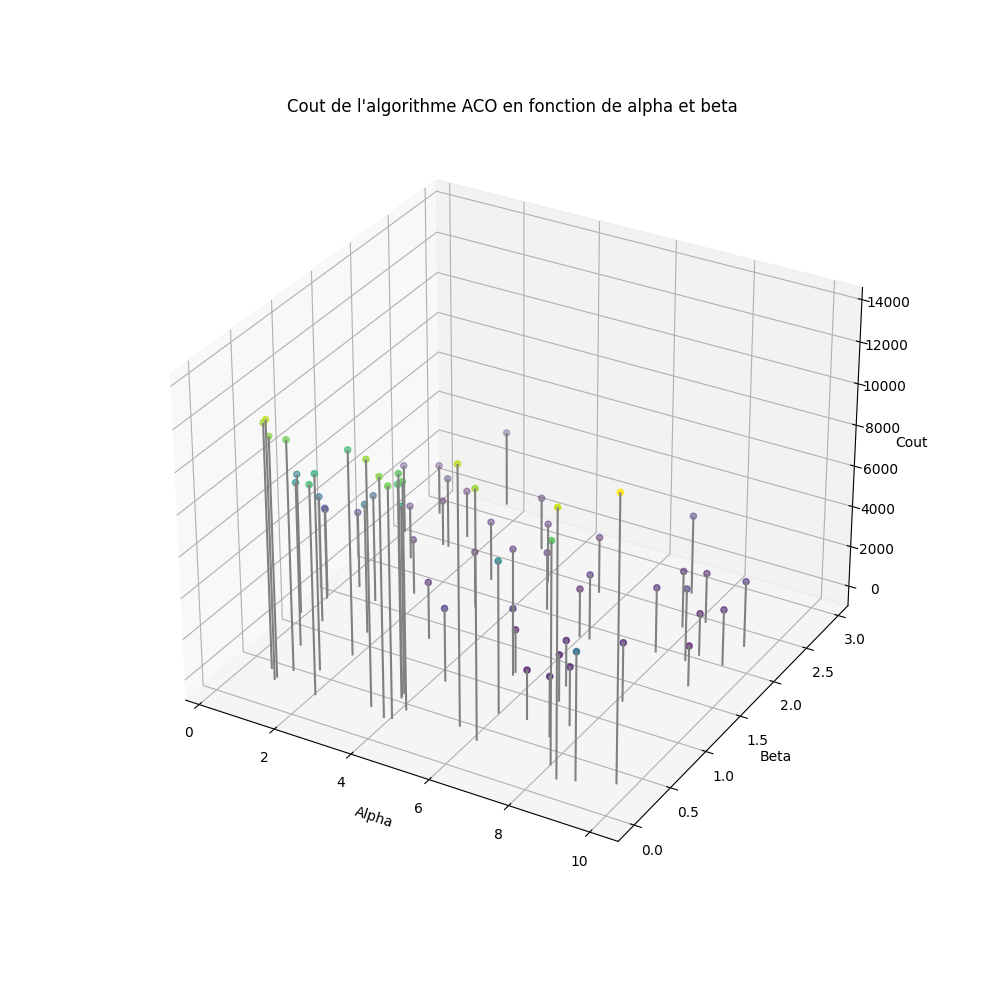

In [78]:
utils = Utils()
%matplotlib widget
utils.threeD_plot(filename='./vendor/benchmarks/param_test/alpha_beta.csv', valueA='alpha', valueB='beta', shownValueA='Alpha', shownValueB='Beta',title='Cout de l\'algorithme ACO en fonction de alpha et beta')

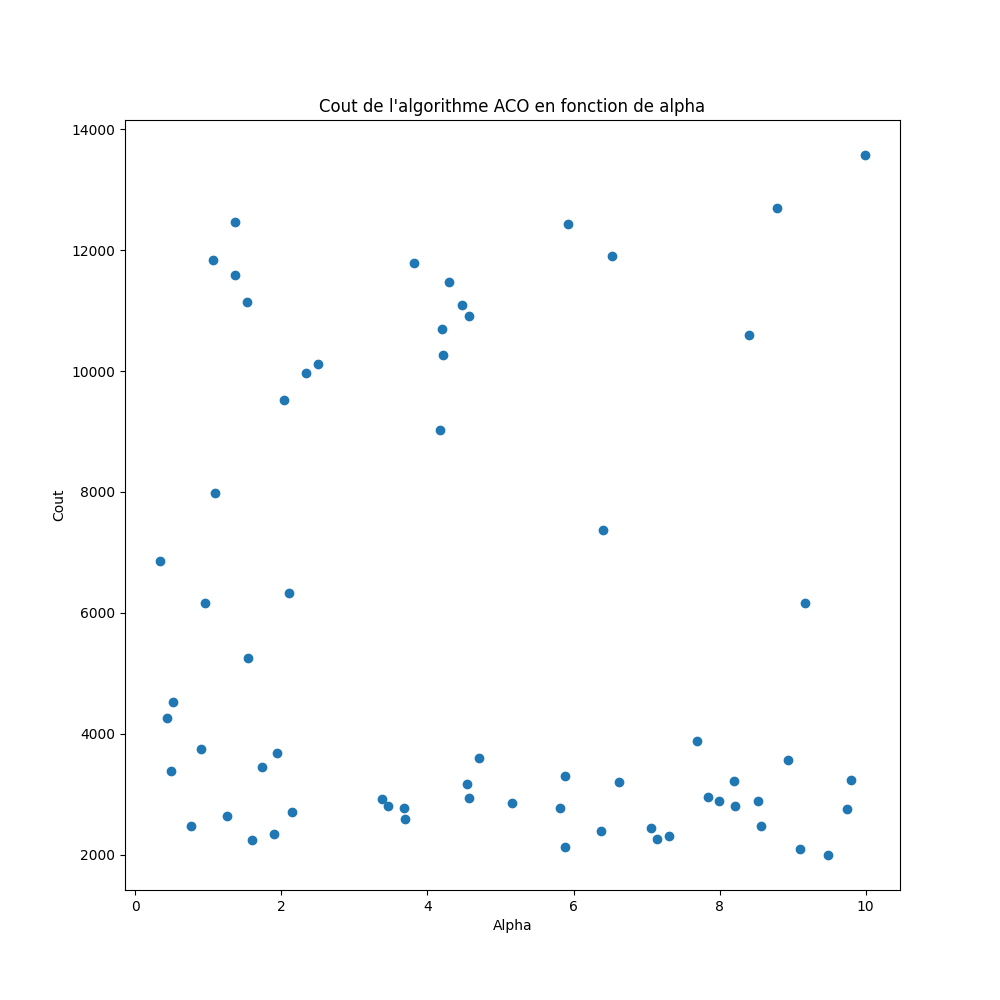

In [79]:
utils.twoD_plot(filename='./vendor/benchmarks/param_test/alpha_beta.csv', value='alpha', shownValue='Alpha',title='Cout de l\'algorithme ACO en fonction de alpha')

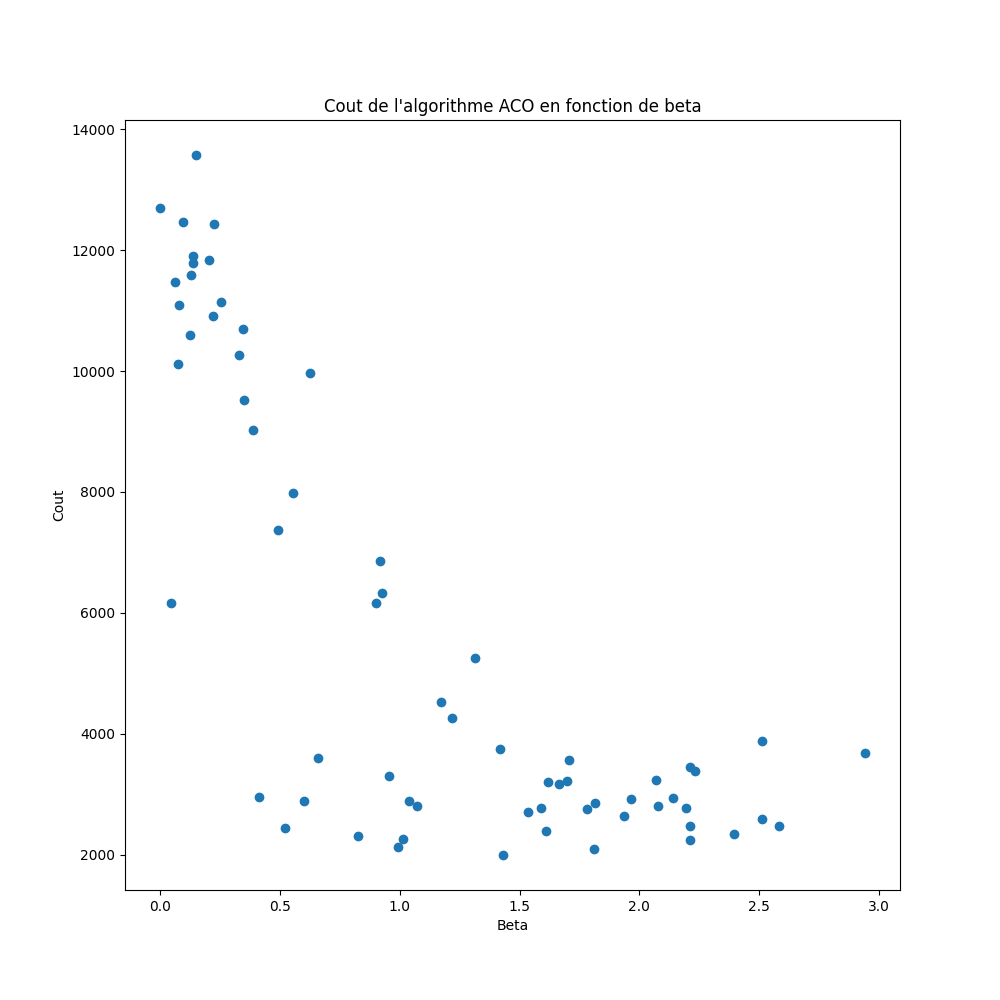

In [80]:
utils.twoD_plot(filename='./vendor/benchmarks/param_test/alpha_beta.csv', value='beta', shownValue='Beta',title='Cout de l\'algorithme ACO en fonction de beta')

Les trois graphes ci-dessus montrent le cout de l'algorithme ACO en fonction de alpha et beta. On peut voir que le cout est plus faible lorsque beta est plus elevé. En ce qu'il est d'alpha, on ne remarque pas de différences significatives.

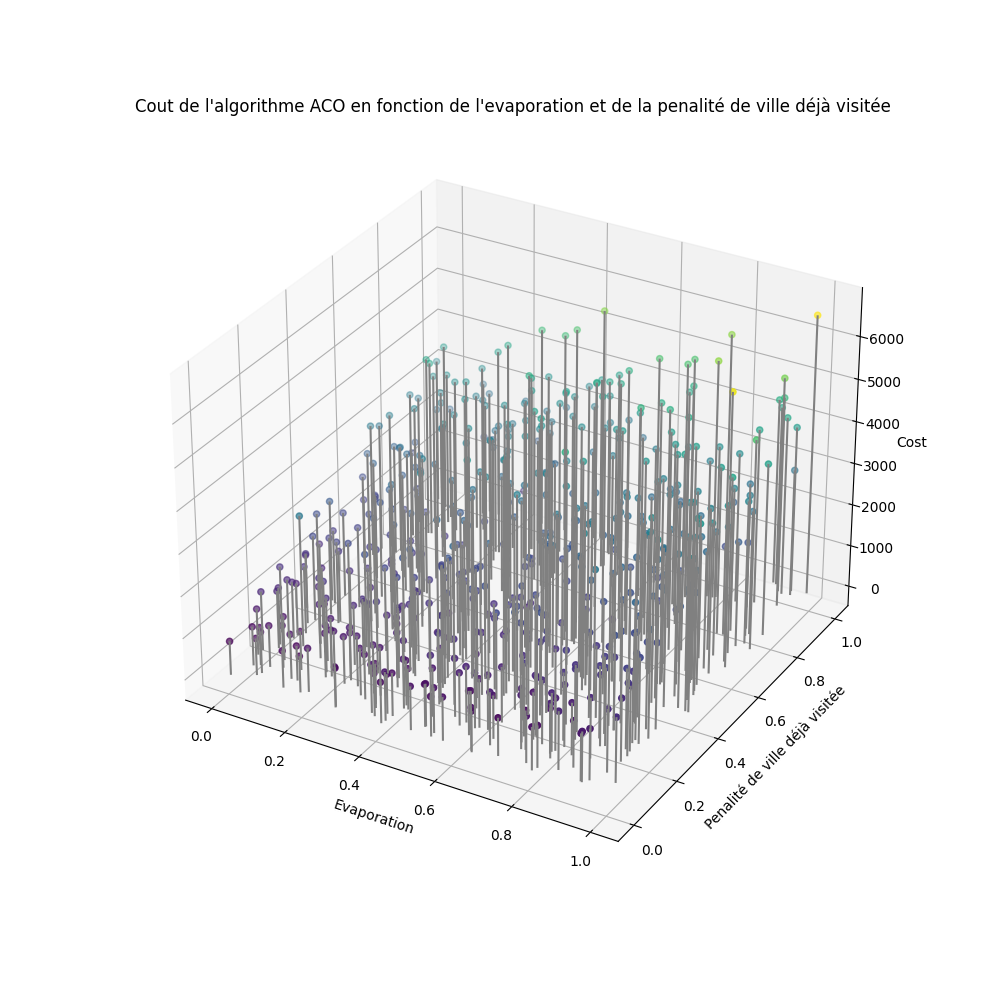

In [69]:
%matplotlib widget
utils.threeD_plot(filename='./vendor/benchmarks/param_test/evap_penalty.csv', valueA='evaporation', valueB='already_visited_penalty', shownValueA='Evaporation', shownValueB='Penalité de ville déjà visitée',title='Cout de l\'algorithme ACO en fonction de l\'evaporation et de la penalité de ville déjà visitée')

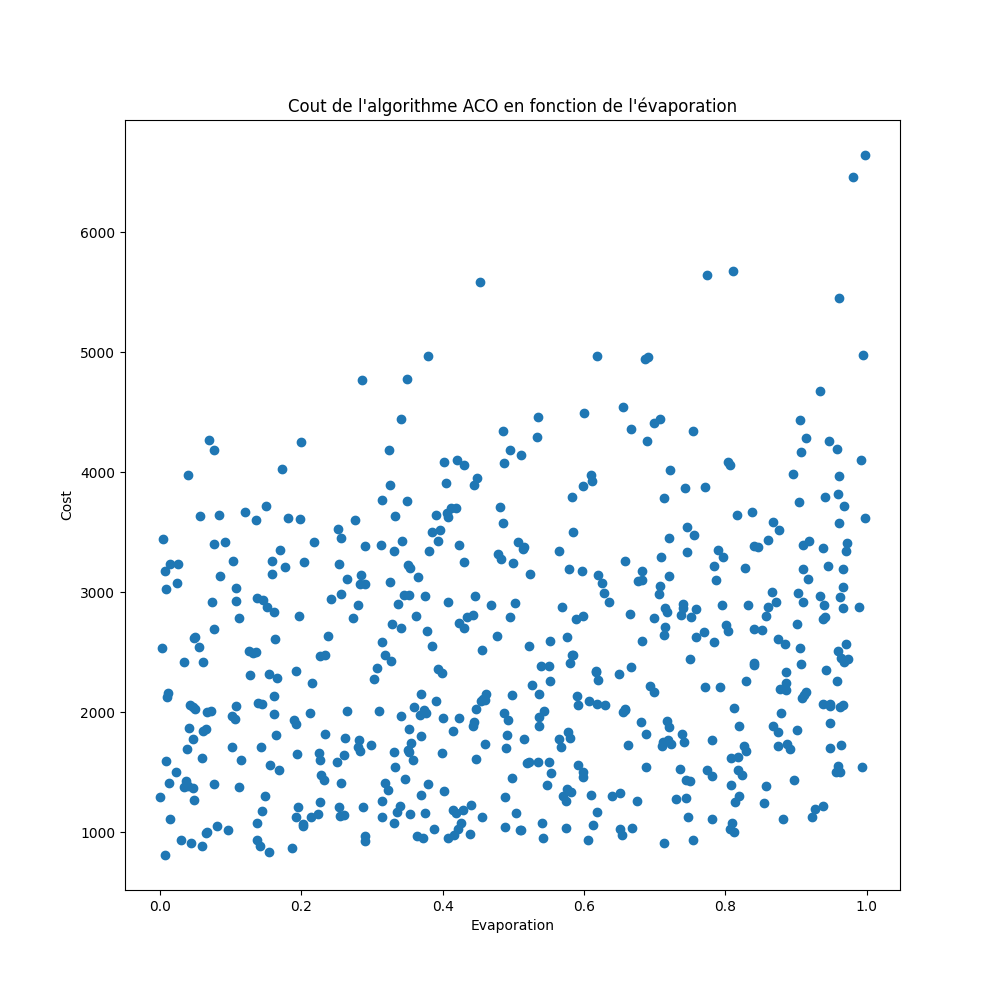

In [70]:
utils.twoD_plot(filename='./vendor/benchmarks/param_test/evap_penalty.csv', value='evaporation', shownValue='Evaporation',title='Cout de l\'algorithme ACO en fonction de l\'évaporation')


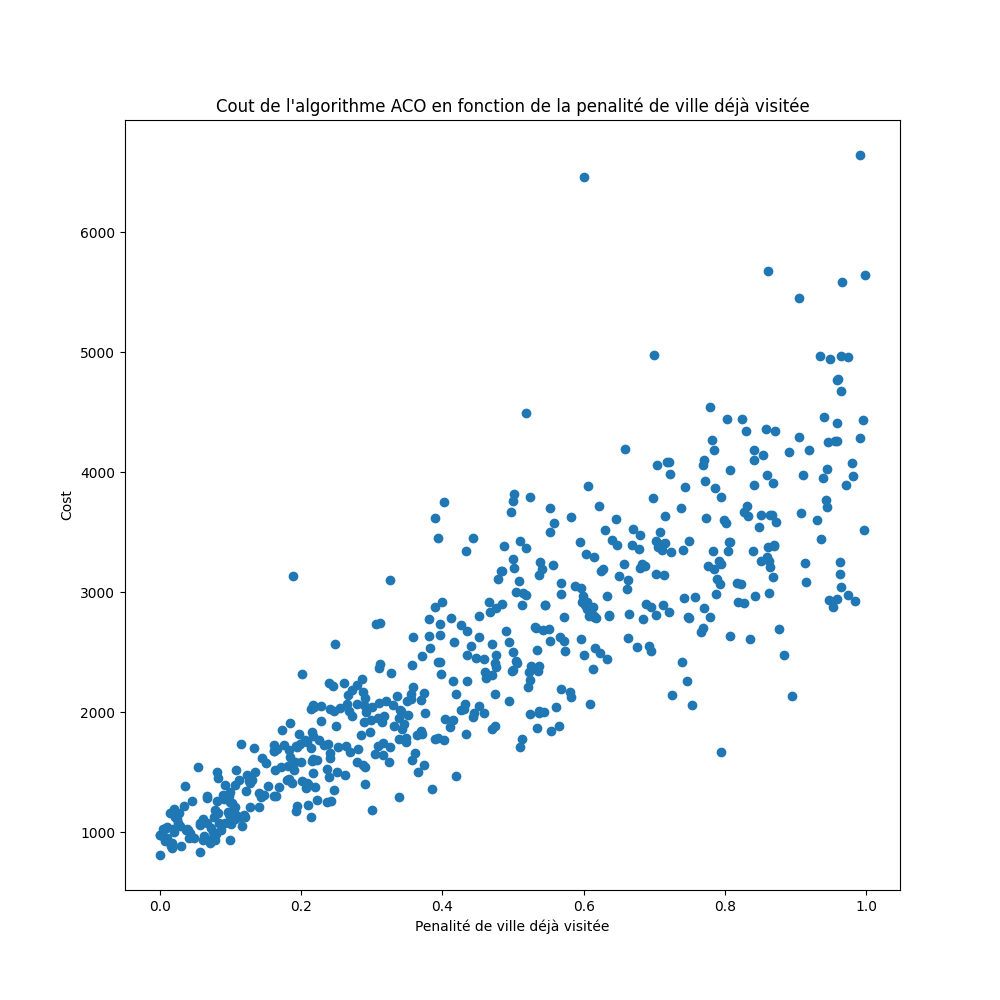

In [71]:
utils.twoD_plot(filename='./vendor/benchmarks/param_test/evap_penalty.csv', value='already_visited_penalty', shownValue='Penalité de ville déjà visitée',title='Cout de l\'algorithme ACO en fonction de la penalité de ville déjà visitée')

Les trois graphes ci-dessus montrent le cout de l'algorithme ACO en fonction de l'evaporation et de la penalité de ville déjà visitée. On remarque que l'évaporation n'a pas d'impact significatif sur le cout de l'algorithme. Par contre, la penalité de ville déjà visitée a un impact significatif sur le cout de l'algorithme. On remarque que le cout est plus faible lorsque la penalité tend vers 0. Nous avon néanmoins choisi de garder une penalité de 0.5 pour réduire les chances dans une boucle infinie.

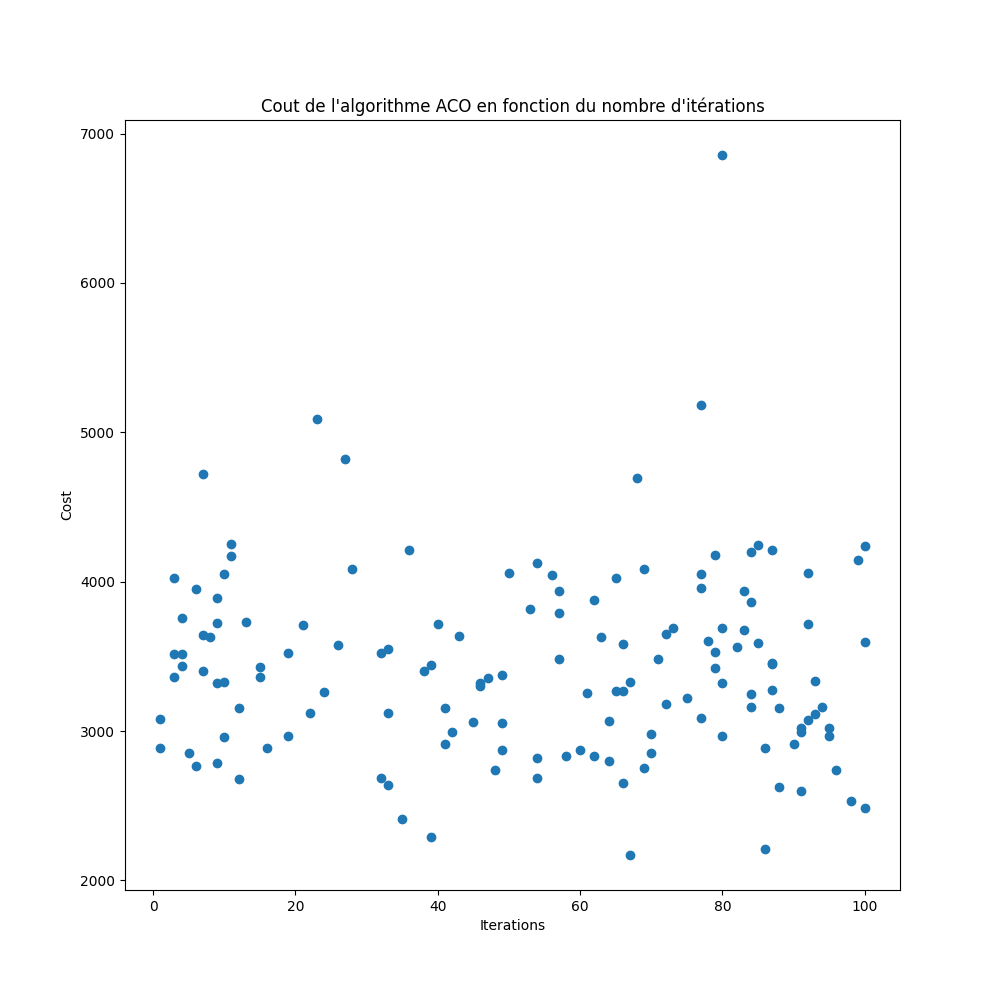

In [72]:
utils.twoD_plot(filename='./vendor/benchmarks/param_test/iterations.csv', value='iterations', shownValue='Iterations',title='Cout de l\'algorithme ACO en fonction du nombre d\'itérations')

Le graphe ci-dessus montre le cout de l'algorithme ACO en fonction du nombre d'itérations. On remarque que le cout diminue lorsque le nombre d'itérations augmente.